In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ImageManipulation as IM
import os
import findPeaksLib
import GaussFits
import pickle
from GaussAnalysisPipeline import *
import precisionFuncs as pF
from scipy.optimize import minimize
import sys
sys.path.append(r'K:\vanderVoortN\FRC\dev\GaussAnalysis')
import developmental_functions as df

In [5]:
from developmental_functions import *

In [6]:
from importlib import reload
reload(df)

<module 'developmental_functions' from 'K:\\vanderVoortN\\FRC\\dev\\GaussAnalysis\\developmental_functions.py'>

# helper functions

# Analysis functions

# Unfinished code

# CF C-L data

### Analyse data new

In [2]:
wdir = r'N:\Singlem\singlem20-1\January\24_CL_origami_NV\CF_run1\all'
files = os.listdir(wdir)
options = optionsCluster(fitbg = 0, setbg = 0.2, ellipt_circ = 0)
CLLst = []
analyseCFdir(CLLst, options, wdir)

KeyboardInterrupt: 

### Load previously analysed data

In [2]:
wdir = r'N:\Singlem\singlem20-1\January\24_CL_origami_NV\CF_run1\all'
fpath = os.path.join(wdir, 'SpotsObject.spots')
with open(fpath, 'rb') as spotsfile:
    CLLst = pickle.load(spotsfile)

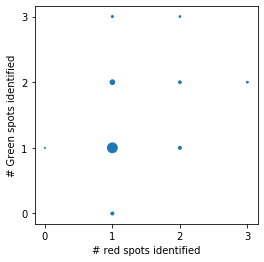

In [3]:
plotOccurence(CLLst)
filterCLLst = selectSpotOccurence(CLLst, [1], [1])

In [4]:
var = pF.findVar([0,0,110,1.5, 700], 50)
print('standard deviation of G Channel is %.2f' % np.sqrt(var))
var = pF.findVar([0,0,114,2.4, 6000], 50)
print('standard deviation of G Channel is %.2f' % np.sqrt(var))

integral in variance has value -0.415736
standard deviation of G Channel is 5.44
integral in variance has value -0.238549
standard deviation of G Channel is 1.69


In [5]:
pxSize = 50
Gbg = []
Ybg = []
GA = []
YA = []
Gsigma = []
Ysigma = []
for loc in filterCLLst:
    Gbg.append(loc['G'].spotLst[0].bg)
    Ybg.append(loc['Y'].spotLst[0].bg)
    GA.append(loc['G'].spotLst[0].A * 2 * np.pi * loc['G'].spotLst[0].sigma)
    YA.append(loc['Y'].spotLst[0].A * 2 * np.pi * loc['Y'].spotLst[0].sigma)
    Gsigma.append(loc['G'].spotLst[0].sigma)
    Ysigma.append(loc['Y'].spotLst[0].sigma)

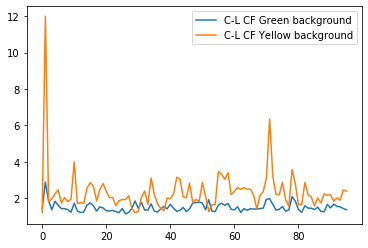

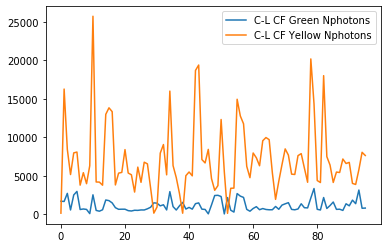

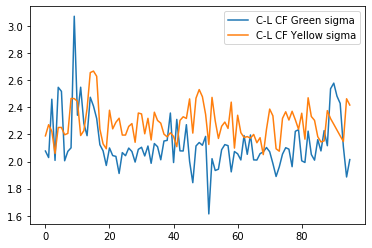

average photons in G: 1142 
average photons in Y: 7114
average sigma in G: 106.5 
average sigma in Y: 114.0
average bg in G: 1.49 
average bg in Y: 2.34


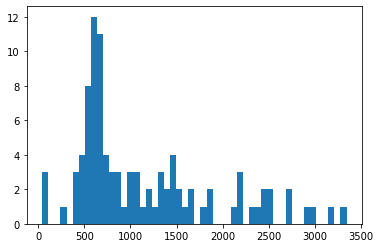

In [6]:
plt.plot(Gbg, label = 'C-L CF Green background')
plt.plot(Ybg, label = 'C-L CF Yellow background')
plt.legend()
plt.show()
plt.plot(GA, label = 'C-L CF Green Nphotons')
plt.plot(YA, label = 'C-L CF Yellow Nphotons')
plt.legend()
plt.show()
plt.plot(Gsigma, label = 'C-L CF Green sigma')
plt.plot(Ysigma, label = 'C-L CF Yellow sigma')
plt.legend()
plt.show()
print('average photons in G: %.0f \naverage photons in Y: %.0f' % (np.mean(GA), np.mean(YA)))
print('average sigma in G: %.1f \naverage sigma in Y: %.1f' % (np.mean(Gsigma) * pxSize, np.mean(Ysigma)*pxSize))
print('average bg in G: %.2f \naverage bg in Y: %.2f' % (np.mean(Gbg), np.mean(Ybg)))

_ = plt.hist(GA, bins = 50)

standard deviation of spots is 24.07 and 12.55


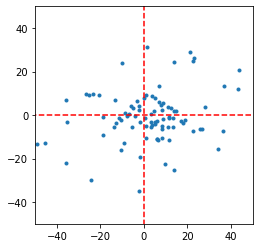

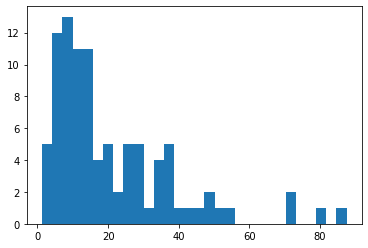

In [10]:
coords = plotSinglePair(filterCLLst, pxSize = 50)
_ = plt.hist(np.linalg.norm(coords, axis = 1), bins = 30)

# CF C-R data

### load previously processed data

In [11]:
wdir = r'N:\Singlem\singlem20-1\January\25_CR_origami_NV\Run1_CF\all'
fpath = os.path.join(wdir, 'SpotsObject.spots')
with open(fpath, 'rb') as spotsfile:
    CRLst = pickle.load(spotsfile)

### process data new

In [11]:
wdir = r'N:\Singlem\singlem20-1\January\25_CR_origami_NV\Run1_CF\all'
files = os.listdir(wdir)
options = optionsCluster(fitbg = 0, setbg = 0.2, ellipt_circ = 0)
CRLst = []
nfiles = 10
analyseCFdir(CRLst, options, nfiles = nfiles)

analysing image no. 0
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\CF_run1\\all\\header\\Overview_Pos_y-0.00111784_spot_72.txt'
number of records is 35664


K:\vanderVoortN\FRC\Code\GaussAnalysisPipeline.py:293: RuntimeWarning: divide by zero encountered in true_divide
  plt.imshow(model - image *( 1 + np.log(model / image)), cmap = 'hot')
K:\vanderVoortN\FRC\Code\GaussAnalysisPipeline.py:293: RuntimeWarning: invalid value encountered in multiply
  plt.imshow(model - image *( 1 + np.log(model / image)), cmap = 'hot')
K:\vanderVoortN\FRC\Code\GaussAnalysisPipeline.py:271: UserWarning: No contour levels were found within the data range.
  plt.contour(model, levels = np.array([0.01, 0.5, 1, 3, 5, 10, 20, 30, 40], dtype = np.double))
K:\vanderVoortN\FRC\Code\GaussAnalysisPipeline.py:293: RuntimeWarning: invalid value encountered in log
  plt.imshow(model - image *( 1 + np.log(model / image)), cmap = 'hot')
K:\vanderVoortN\FRC\Code\GaussAnalysisPipeline.py:136: RuntimeWarning: invalid value encountered in greater
  isNoJunkIstar = twoIstar > junkIstar
K:\vanderVoortN\FRC\Code\GaussAnalysisPipeline.py:141: RuntimeWarning: invalid value encounter

[{'G': <GaussAnalysisPipeline.Channel at 0x1c2664a4988>,
  'Y': <GaussAnalysisPipeline.Channel at 0x1c26628bc48>}]

<Figure size 432x288 with 0 Axes>

### Analysis

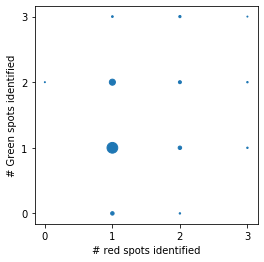

In [12]:
plotOccurence(CRLst)
filterCRLst = selectSpotOccurence(CRLst, [1], [1])

In [13]:
pxSize = 50
Gbg = []
Ybg = []
GA = []
YA = []
Gsigma = []
Ysigma = []
for loc in filterCRLst:
    Gbg.append(loc['G'].spotLst[0].bg)
    Ybg.append(loc['Y'].spotLst[0].bg)
    GA.append(loc['G'].spotLst[0].A * 2 * np.pi * loc['G'].spotLst[0].sigma)
    YA.append(loc['Y'].spotLst[0].A * 2 * np.pi * loc['Y'].spotLst[0].sigma)
    Gsigma.append(loc['G'].spotLst[0].sigma)
    Ysigma.append(loc['Y'].spotLst[0].sigma)

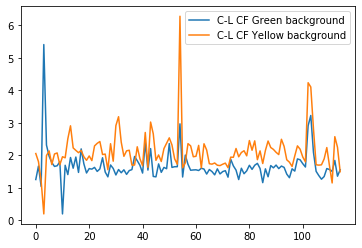

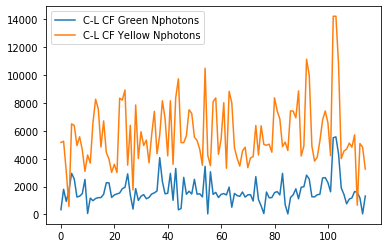

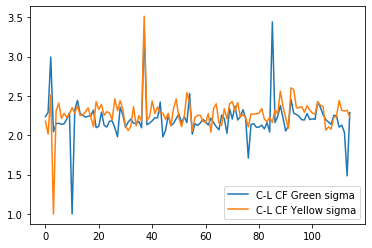

average photons in G: 1645 
average photons in Y: 5753
average sigma in G: 110.1 
average sigma in Y: 113.9
average bg in G: 1.67 
average bg in Y: 2.11


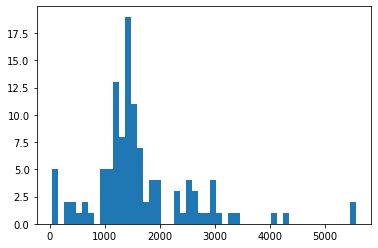

In [14]:
plt.plot(Gbg, label = 'C-L CF Green background')
plt.plot(Ybg, label = 'C-L CF Yellow background')
plt.legend()
plt.show()
plt.plot(GA, label = 'C-L CF Green Nphotons')
plt.plot(YA, label = 'C-L CF Yellow Nphotons')
plt.legend()
plt.show()
plt.plot(Gsigma, label = 'C-L CF Green sigma')
plt.plot(Ysigma, label = 'C-L CF Yellow sigma')
plt.legend()
plt.show()
print('average photons in G: %.0f \naverage photons in Y: %.0f' % (np.mean(GA), np.mean(YA)))
print('average sigma in G: %.1f \naverage sigma in Y: %.1f' % (np.mean(Gsigma) * pxSize, np.mean(Ysigma)*pxSize))
print('average bg in G: %.2f \naverage bg in Y: %.2f' % (np.mean(Gbg), np.mean(Ybg)))

_ = plt.hist(GA, bins = 50)

In [124]:
var = pF.findVar([0,0,110,1.7, 1600], 50)
print('standard deviation of G Channel is %.2f' % np.sqrt(var))
var = pF.findVar([0,0,114,2.1, 5000], 50)
print('standard deviation of Y Channel is %.2f' % np.sqrt(var))

integral in variance has value -0.318628
standard deviation of G Channel is 3.33
integral in variance has value -0.227795
standard deviation of G Channel is 1.83


standard deviation of spots is 18.99 and 18.17


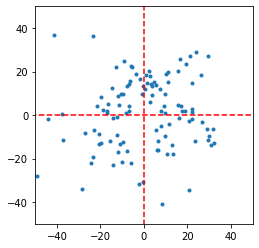

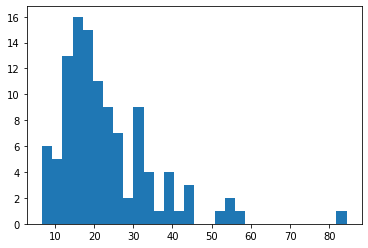

In [15]:
coords = plotSinglePair(filterCRLst, pxSize = 50)
_ = plt.hist(np.linalg.norm(coords, axis = 1), bins = 30)

In [27]:
filterCRLst[0]['G'].spotLst[0].eps

0.7678770926320612

# STED C-L data

### merge PTU files

In [ ]:
path = os.path.join(r'N:\Singlem\singlem20-1\January\24_CL_origami_NV\STED_run2', '')
savedir = os.path.join(path, 'all')
mergePTUfiles(path, savedir)

### Analyze data new

In [2]:
wdir = r'N:\Singlem\singlem20-1\January\24_CL_origami_NV\STED_run2\all'
files = os.listdir(wdir)[:1908] + os.listdir(wdir)[1910:]
options = optionsCluster(fitbg = 0, setbg = 0.2, ellipt_circ = 1)
STEDCLLst = []
analyseSTEDdir(
    STEDCLLst, options, wdir, files, Ggate = 0, Ygate = 29,
    DTwoIstar = 0.03, garbageBrightness = 20, junkIstar = 0.30, outname = 'STEDCL.spots')

analysing image no. 0
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_0_x_-50.0_y_-163.0.txt'
number of records is 34087


K:\vanderVoortN\FRC\Code\GaussAnalysisPipeline.py:141: RuntimeWarning: invalid value encountered in greater
  isNoJunkIstar = twoIstar > junkIstar
K:\vanderVoortN\FRC\Code\GaussAnalysisPipeline.py:146: RuntimeWarning: invalid value encountered in less
  isSignificantlyLower[i] = (twoIstar[i] + DTwoIstar < twoIstar[: i]).all()


analysing image no. 1
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_1_x_-175.0_y_-129.0.txt'
number of records is 32495
analysing image no. 2
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_2_x_18.0_y_-35.0.txt'
number of records is 33516
analysing image no. 3
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_3_x_140.0_y_24.0.txt'
number of records is 32213
analysing image no. 4
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_4_x_-35.0_y_147.0.txt'
number of records is 30650
analysing image no. 5
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_

analysing image no. 41
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_40_x_-34.0_y_149.0.txt'
number of records is 37138
analysing image no. 42
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_41_x_-142.0_y_162.0.txt'
number of records is 30761
analysing image no. 43
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00039596_spot_0_x_195.0_y_-188.0.txt'
number of records is 33472
analysing image no. 44
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00039596_spot_1_x_182.0_y_-174.0.txt'
number of records is 32215
analysing image no. 45
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0

analysing image no. 79
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00039596_spot_36_x_112.0_y_-12.0.txt'
number of records is 31523
analysing image no. 80
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00039596_spot_37_x_-24.0_y_-8.0.txt'
number of records is 30873
analysing image no. 81
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00039596_spot_38_x_-25.0_y_-6.0.txt'
number of records is 31372
analysing image no. 82
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00039596_spot_39_x_-44.0_y_25.0.txt'
number of records is 31089
analysing image no. 83
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.000

analysing image no. 117
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00041796_spot_17_x_-137.0_y_-141.0.txt'
number of records is 33726
analysing image no. 118
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00041796_spot_18_x_-125.0_y_-140.0.txt'
number of records is 32558
analysing image no. 119
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00041796_spot_19_x_-198.0_y_-139.0.txt'
number of records is 32251
analysing image no. 120
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00041796_spot_20_x_-123.0_y_-138.0.txt'
number of records is 37200
analysing image no. 121
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOver

analysing image no. 156
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00041796_spot_56_x_-5.0_y_88.0.txt'
number of records is 31564
ROI touches image borders, skipping
analysing image no. 157
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00041796_spot_57_x_133.0_y_92.0.txt'
number of records is 39709
analysing image no. 158
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00041796_spot_58_x_-47.0_y_95.0.txt'
number of records is 38463
analysing image no. 159
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00041796_spot_59_x_178.0_y_109.0.txt'
number of records is 32278
ROI touches image borders, skipping
analysing image no. 160
header dir already exists
b'N:\\Singlem\\singlem20-1

analysing image no. 192
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_19_x_-59.0_y_-111.0.txt'
number of records is 33298
analysing image no. 193
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_20_x_-130.0_y_-108.0.txt'
number of records is 30828
analysing image no. 194
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_21_x_-132.0_y_-106.0.txt'
number of records is 32411
ROI touches image borders, skipping
analysing image no. 195
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_22_x_-93.0_y_-104.0.txt'
number of records is 32230
analysing image no. 196
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_N

analysing image no. 230
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_57_x_121.0_y_163.0.txt'
number of records is 31225
ROI touches image borders, skipping
analysing image no. 231
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_58_x_-147.0_y_165.0.txt'
number of records is 30127
ROI touches image borders, skipping
analysing image no. 232
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_59_x_193.0_y_175.0.txt'
number of records is 30384
analysing image no. 233
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_60_x_194.0_y_177.0.txt'
number of records is 31771
ROI touches image borders, skipping
analysing image no. 234
header dir 

analysing image no. 268
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00046196_spot_32_x_140.0_y_-36.0.txt'
number of records is 30297
analysing image no. 269
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00046196_spot_33_x_143.0_y_-36.0.txt'
number of records is 34033
analysing image no. 270
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00046196_spot_34_x_64.0_y_-34.0.txt'
number of records is 30347
analysing image no. 271
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00046196_spot_35_x_28.0_y_-19.0.txt'
number of records is 31127
analysing image no. 272
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y

analysing image no. 307
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00052796_spot_5_x_-17.0_y_143.0.txt'
number of records is 33301
analysing image no. 308
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00052796_spot_6_x_105.0_y_157.0.txt'
number of records is 31597
analysing image no. 309
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00052796_spot_7_x_108.0_y_158.0.txt'
number of records is 31190
analysing image no. 310
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00052796_spot_8_x_106.0_y_159.0.txt'
number of records is 31403
analysing image no. 311
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0

analysing image no. 346
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00052796_spot_44_x_-15.0_y_141.0.txt'
number of records is 31612
analysing image no. 347
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00061596_spot_0_x_-74.0_y_-195.0.txt'
number of records is 34665
analysing image no. 348
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00061596_spot_1_x_-71.0_y_-194.0.txt'
number of records is 33484
analysing image no. 349
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00061596_spot_2_x_-161.0_y_-94.0.txt'
number of records is 33351
analysing image no. 350
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos

analysing image no. 384
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00061596_spot_37_x_-53.0_y_57.0.txt'
number of records is 33955
analysing image no. 385
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00061596_spot_38_x_113.0_y_100.0.txt'
number of records is 31890
analysing image no. 386
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00061596_spot_39_x_55.0_y_106.0.txt'
number of records is 30558
analysing image no. 387
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00061596_spot_40_x_55.0_y_110.0.txt'
number of records is 30168
analysing image no. 388
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-

analysing image no. 422
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00063796_spot_23_x_-116.0_y_-55.0.txt'
number of records is 36629
analysing image no. 423
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00063796_spot_24_x_-128.0_y_-53.0.txt'
number of records is 31270
analysing image no. 424
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00063796_spot_25_x_-126.0_y_-53.0.txt'
number of records is 29455
ROI touches image borders, skipping
analysing image no. 425
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00063796_spot_26_x_-177.0_y_-24.0.txt'
number of records is 32050
analysing image no. 426
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\

analysing image no. 460
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00065996_spot_16_x_-168.0_y_-119.0.txt'
number of records is 31151
analysing image no. 461
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00065996_spot_17_x_-78.0_y_-116.0.txt'
number of records is 31646
analysing image no. 462
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00065996_spot_18_x_174.0_y_-70.0.txt'
number of records is 34674
analysing image no. 463
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00065996_spot_19_x_54.0_y_-54.0.txt'
number of records is 31222
analysing image no. 464
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_P

analysing image no. 498
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00068196_spot_27_x_-147.0_y_-37.0.txt'
number of records is 33376
analysing image no. 499
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00068196_spot_28_x_-35.0_y_-28.0.txt'
number of records is 31446
analysing image no. 500
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00068196_spot_29_x_-189.0_y_18.0.txt'
number of records is 31339
analysing image no. 501
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00068196_spot_30_x_75.0_y_18.0.txt'
number of records is 31064
analysing image no. 502
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_

analysing image no. 536
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00070396_spot_10_x_82.0_y_-182.0.txt'
number of records is 32112
analysing image no. 537
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00070396_spot_11_x_82.0_y_-180.0.txt'
number of records is 29771
analysing image no. 538
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00070396_spot_12_x_81.0_y_-179.0.txt'
number of records is 32083
analysing image no. 539
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00070396_spot_13_x_81.0_y_-176.0.txt'
number of records is 31727
analysing image no. 540
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos

analysing image no. 575
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00070396_spot_49_x_0.0_y_22.0.txt'
number of records is 31109
analysing image no. 576
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00070396_spot_50_x_-169.0_y_43.0.txt'
number of records is 31008
analysing image no. 577
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00070396_spot_51_x_-169.0_y_45.0.txt'
number of records is 35078
analysing image no. 578
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00070396_spot_52_x_5.0_y_65.0.txt'
number of records is 35747
analysing image no. 579
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0

number of records is 36191
analysing image no. 614
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_1_x_177.0_y_-185.0.txt'
number of records is 34825
analysing image no. 615
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_2_x_-24.0_y_-107.0.txt'
number of records is 33758
analysing image no. 616
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_3_x_-157.0_y_-15.0.txt'
number of records is 33350
analysing image no. 617
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_4_x_10.0_y_85.0.txt'
number of records is 31927
analysing image no. 618
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\

analysing image no. 652
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_39_x_8.0_y_84.0.txt'
number of records is 34540
analysing image no. 653
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_40_x_-54.0_y_110.0.txt'
number of records is 36116
analysing image no. 654
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_41_x_-51.0_y_112.0.txt'
number of records is 31635
analysing image no. 655
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_42_x_127.0_y_139.0.txt'
number of records is 33204
analysing image no. 656
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-

ROI touches image borders, skipping
analysing image no. 690
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00076996_spot_29_x_135.0_y_93.0.txt'
number of records is 32109
analysing image no. 691
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00076996_spot_30_x_-143.0_y_131.0.txt'
number of records is 29582
analysing image no. 692
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00076996_spot_31_x_-145.0_y_132.0.txt'
number of records is 35316
analysing image no. 693
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00076996_spot_32_x_-39.0_y_141.0.txt'
number of records is 33372
analysing image no. 694
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\ST

analysing image no. 728
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00079196_spot_31_x_-133.0_y_-30.0.txt'
number of records is 30640
analysing image no. 729
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00079196_spot_32_x_-130.0_y_-29.0.txt'
number of records is 30789
analysing image no. 730
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00079196_spot_33_x_-96.0_y_-28.0.txt'
number of records is 30077
ROI touches image borders, skipping
analysing image no. 731
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00079196_spot_34_x_-132.0_y_-27.0.txt'
number of records is 29967
ROI touches image borders, skipping
analysing image no. 732
header dir already exists
b'N:\\Singlem\\sing

analysing image no. 766
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_11_x_165.0_y_-189.0.txt'
number of records is 33679
analysing image no. 767
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_12_x_165.0_y_-187.0.txt'
number of records is 32951
analysing image no. 768
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_13_x_166.0_y_-185.0.txt'
number of records is 32831
analysing image no. 769
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_14_x_156.0_y_-183.0.txt'
number of records is 31870
analysing image no. 770
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview

analysing image no. 803
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_48_x_-193.0_y_-122.0.txt'
number of records is 31263
analysing image no. 804
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_49_x_-8.0_y_-33.0.txt'
number of records is 35064
analysing image no. 805
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_50_x_-89.0_y_-28.0.txt'
number of records is 34178
analysing image no. 806
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_51_x_-9.0_y_-28.0.txt'
number of records is 32542
analysing image no. 807
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos

analysing image no. 841
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00090196_spot_10_x_115.0_y_-150.0.txt'
number of records is 33779
analysing image no. 842
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00090196_spot_11_x_-87.0_y_-99.0.txt'
number of records is 33406
analysing image no. 843
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00090196_spot_12_x_27.0_y_-94.0.txt'
number of records is 31644
analysing image no. 844
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00090196_spot_13_x_26.0_y_-91.0.txt'
number of records is 30470
analysing image no. 845
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_

analysing image no. 879
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00092396_spot_15_x_-47.0_y_-122.0.txt'
number of records is 30716
analysing image no. 880
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00092396_spot_16_x_-64.0_y_-118.0.txt'
number of records is 32298
analysing image no. 881
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00092396_spot_17_x_-63.0_y_-117.0.txt'
number of records is 30638
analysing image no. 882
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00092396_spot_18_x_-65.0_y_-115.0.txt'
number of records is 31454
analysing image no. 883
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview

analysing image no. 918
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_10_x_85.0_y_-138.0.txt'
number of records is 31263
analysing image no. 919
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_11_x_-22.0_y_-131.0.txt'
number of records is 32379
analysing image no. 920
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_12_x_-49.0_y_-110.0.txt'
number of records is 30658
analysing image no. 921
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_13_x_190.0_y_-109.0.txt'
number of records is 29974
ROI touches image borders, skipping
analysing image no. 922
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\

analysing image no. 956
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_48_x_158.0_y_134.0.txt'
number of records is 51065
ROI touches image borders, skipping
analysing image no. 957
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_49_x_165.0_y_134.0.txt'
number of records is 47359
analysing image no. 958
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_50_x_163.0_y_137.0.txt'
number of records is 55974
ROI touches image borders, skipping
analysing image no. 959
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_51_x_156.0_y_139.0.txt'
number of records is 56014
ROI touches image borders, skipping
analysing image no. 960
header dir a

analysing image no. 991
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_83_x_-55.0_y_162.0.txt'
number of records is 34501
analysing image no. 992
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_84_x_-187.0_y_187.0.txt'
number of records is 34678
analysing image no. 993
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_85_x_-187.0_y_189.0.txt'
number of records is 34271
analysing image no. 994
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_86_x_-189.0_y_190.0.txt'
number of records is 31863
analysing image no. 995
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_

analysing image no. 1030
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00096796_spot_34_x_-61.0_y_40.0.txt'
number of records is 31839
analysing image no. 1031
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00096796_spot_35_x_-63.0_y_43.0.txt'
number of records is 32297
analysing image no. 1032
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00096796_spot_36_x_88.0_y_61.0.txt'
number of records is 29213
ROI touches image borders, skipping
analysing image no. 1033
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00096796_spot_37_x_-37.0_y_72.0.txt'
number of records is 33024
analysing image no. 1034
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STE

analysing image no. 1068
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00098996_spot_22_x_-185.0_y_-120.0.txt'
number of records is 30622
analysing image no. 1069
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00098996_spot_23_x_-113.0_y_-119.0.txt'
number of records is 33087
analysing image no. 1070
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00098996_spot_24_x_-184.0_y_-118.0.txt'
number of records is 30805
analysing image no. 1071
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00098996_spot_25_x_184.0_y_-69.0.txt'
number of records is 31207
analysing image no. 1072
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allO

analysing image no. 1106
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00098996_spot_60_x_25.0_y_162.0.txt'
number of records is 29042
analysing image no. 1107
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00098996_spot_61_x_24.0_y_164.0.txt'
number of records is 29135
analysing image no. 1108
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00098996_spot_62_x_23.0_y_166.0.txt'
number of records is 31418
analysing image no. 1109
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00098996_spot_63_x_25.0_y_166.0.txt'
number of records is 32709
ROI touches image borders, skipping
analysing image no. 1110
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\ST

analysing image no. 1144
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00103396_spot_28_x_-53.0_y_-53.0.txt'
number of records is 32760
analysing image no. 1145
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00103396_spot_29_x_-52.0_y_-49.0.txt'
number of records is 30711
ROI touches image borders, skipping
analysing image no. 1146
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00103396_spot_30_x_35.0_y_-30.0.txt'
number of records is 30131
ROI touches image borders, skipping
analysing image no. 1147
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00103396_spot_31_x_33.0_y_-29.0.txt'
number of records is 33526
analysing image no. 1148
header dir already exists
b'N:\\Singlem\\sing

analysing image no. 1182
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00105596_spot_9_x_-51.0_y_195.0.txt'
number of records is 32922
analysing image no. 1183
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00105596_spot_10_x_194.0_y_-172.0.txt'
number of records is 33486
analysing image no. 1184
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00105596_spot_11_x_195.0_y_-170.0.txt'
number of records is 32348
analysing image no. 1185
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00105596_spot_12_x_39.0_y_-146.0.txt'
number of records is 31908
analysing image no. 1186
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOvervi

analysing image no. 1220
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00105596_spot_47_x_77.0_y_160.0.txt'
number of records is 31229
analysing image no. 1221
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00107796_spot_0_x_-94.0_y_-195.0.txt'
number of records is 32944
analysing image no. 1222
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00107796_spot_1_x_-95.0_y_-193.0.txt'
number of records is 31140
analysing image no. 1223
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00107796_spot_2_x_-186.0_y_-91.0.txt'
number of records is 33149
analysing image no. 1224
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview

analysing image no. 1258
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00107796_spot_37_x_-84.0_y_-8.0.txt'
number of records is 33051
analysing image no. 1259
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00107796_spot_38_x_-83.0_y_-6.0.txt'
number of records is 32478
analysing image no. 1260
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00107796_spot_39_x_-125.0_y_1.0.txt'
number of records is 32314
analysing image no. 1261
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00107796_spot_40_x_177.0_y_17.0.txt'
number of records is 31495
analysing image no. 1262
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Po

analysing image no. 1296
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00109996_spot_24_x_15.0_y_-50.0.txt'
number of records is 31817
analysing image no. 1297
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00109996_spot_25_x_14.0_y_-48.0.txt'
number of records is 32009
analysing image no. 1298
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00109996_spot_26_x_97.0_y_-33.0.txt'
number of records is 31681
analysing image no. 1299
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00109996_spot_27_x_97.0_y_-32.0.txt'
number of records is 31667
analysing image no. 1300
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Po

analysing image no. 1334
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00112196_spot_10_x_104.0_y_-174.0.txt'
number of records is 29940
ROI touches image borders, skipping
analysing image no. 1335
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00112196_spot_11_x_104.0_y_-173.0.txt'
number of records is 35813
analysing image no. 1336
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00112196_spot_12_x_166.0_y_-156.0.txt'
number of records is 31364
analysing image no. 1337
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00112196_spot_13_x_163.0_y_-154.0.txt'
number of records is 30052
analysing image no. 1338
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origam

analysing image no. 1372
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00112196_spot_48_x_122.0_y_175.0.txt'
number of records is 30536
ROI touches image borders, skipping
analysing image no. 1373
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00114396_spot_0_x_99.0_y_-197.0.txt'
number of records is 36482
analysing image no. 1374
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00114396_spot_1_x_-35.0_y_-163.0.txt'
number of records is 32913
analysing image no. 1375
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00114396_spot_2_x_-6.0_y_-41.0.txt'
number of records is 32128
analysing image no. 1376
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\S

analysing image no. 1410
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_0_x_73.0_y_-194.0.txt'
number of records is 34342
analysing image no. 1411
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_1_x_73.0_y_-192.0.txt'
number of records is 31827
analysing image no. 1412
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_2_x_71.0_y_-143.0.txt'
number of records is 31873
analysing image no. 1413
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_3_x_-45.0_y_-65.0.txt'
number of records is 30646
analysing image no. 1414
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Po

ROI touches image borders, skipping
analysing image no. 1449
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_39_x_-74.0_y_-23.0.txt'
number of records is 31777
analysing image no. 1450
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_40_x_-77.0_y_-20.0.txt'
number of records is 31668
analysing image no. 1451
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_41_x_-75.0_y_-20.0.txt'
number of records is 31503
analysing image no. 1452
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_42_x_-76.0_y_-18.0.txt'
number of records is 35352
analysing image no. 1453
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV

analysing image no. 1487
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_77_x_-77.0_y_160.0.txt'
number of records is 33325
analysing image no. 1488
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_78_x_-77.0_y_162.0.txt'
number of records is 32515
analysing image no. 1489
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_79_x_55.0_y_165.0.txt'
number of records is 34072
analysing image no. 1490
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_80_x_53.0_y_167.0.txt'
number of records is 35057
ROI touches image borders, skipping
analysing image no. 1491
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\

ROI touches image borders, skipping
analysing image no. 1525
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00118796_spot_26_x_-120.0_y_-88.0.txt'
number of records is 37712
analysing image no. 1526
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00118796_spot_27_x_-120.0_y_-86.0.txt'
number of records is 33486
analysing image no. 1527
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00118796_spot_28_x_-34.0_y_-66.0.txt'
number of records is 32659
analysing image no. 1528
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00118796_spot_29_x_-8.0_y_-66.0.txt'
number of records is 30745
analysing image no. 1529
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_N

analysing image no. 1563
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00010995999999999988_spot_3_x_-88.0_y_-124.0.txt'
number of records is 33747
analysing image no. 1564
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00010995999999999988_spot_4_x_53.0_y_-35.0.txt'
number of records is 33886
analysing image no. 1565
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00010995999999999988_spot_5_x_23.0_y_-15.0.txt'
number of records is 31720
not a .ptu file, skipping
analysing image no. 1567
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00010995999999999988_spot_6_x_-166.0_y_149.0.txt'
number of records is 31057
ROI touches image borders, skipping
analysing image no. 1568
header di

analysing image no. 1600
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00010995999999999988_spot_38_x_-16.0_y_-93.0.txt'
number of records is 32439
analysing image no. 1601
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00010995999999999988_spot_39_x_137.0_y_-54.0.txt'
number of records is 33603
analysing image no. 1602
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00010995999999999988_spot_40_x_52.0_y_-33.0.txt'
number of records is 33130
analysing image no. 1603
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00010995999999999988_spot_41_x_138.0_y_-30.0.txt'
number of records is 32770
analysing image no. 1604
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL

analysing image no. 1638
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_10_x_-47.0_y_-165.0.txt'
number of records is 30061
ROI touches image borders, skipping
analysing image no. 1639
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_11_x_-92.0_y_-157.0.txt'
number of records is 29675
ROI touches image borders, skipping
analysing image no. 1640
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_12_x_-91.0_y_-155.0.txt'
number of records is 33064
analysing image no. 1641
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_13_x_-92.0_y_-154.0.txt'
number of records is 32099
analysing image 

analysing image no. 1676
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_46_x_18.0_y_72.0.txt'
number of records is 34517
analysing image no. 1677
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_47_x_129.0_y_101.0.txt'
number of records is 30878
analysing image no. 1678
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_48_x_127.0_y_104.0.txt'
number of records is 31876
analysing image no. 1679
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_49_x_130.0_y_104.0.txt'
number of records is 30033
analysing image no. 1680
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_

analysing image no. 1713
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00015395999999999986_spot_22_x_153.0_y_-51.0.txt'
number of records is 32314
analysing image no. 1714
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00015395999999999986_spot_23_x_153.0_y_-49.0.txt'
number of records is 30494
analysing image no. 1715
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00015395999999999986_spot_24_x_-97.0_y_-43.0.txt'
number of records is 30413
analysing image no. 1716
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00015395999999999986_spot_25_x_-188.0_y_-40.0.txt'
number of records is 30349
analysing image no. 1717
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_

analysing image no. 1749
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00015395999999999986_spot_58_x_-171.0_y_124.0.txt'
number of records is 32151
analysing image no. 1750
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00015395999999999986_spot_59_x_-54.0_y_127.0.txt'
number of records is 31119
analysing image no. 1751
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00015395999999999986_spot_60_x_-56.0_y_129.0.txt'
number of records is 35725
analysing image no. 1752
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00015395999999999986_spot_61_x_-54.0_y_130.0.txt'
number of records is 33355
analysing image no. 1753
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_

analysing image no. 1785
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00017595999999999996_spot_25_x_186.0_y_-64.0.txt'
number of records is 31775
analysing image no. 1786
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00017595999999999996_spot_26_x_187.0_y_-63.0.txt'
number of records is 34698
analysing image no. 1787
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00017595999999999996_spot_27_x_89.0_y_-27.0.txt'
number of records is 33291
analysing image no. 1788
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00017595999999999996_spot_28_x_89.0_y_-23.0.txt'
number of records is 32681
analysing image no. 1789
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_

number of records is 30939
ROI touches image borders, skipping
analysing image no. 1823
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00019795999999999985_spot_9_x_-195.0_y_189.0.txt'
number of records is 31628
analysing image no. 1824
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00019795999999999985_spot_10_x_18.0_y_-159.0.txt'
number of records is 34509
analysing image no. 1825
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00019795999999999985_spot_11_x_20.0_y_-159.0.txt'
number of records is 32958
analysing image no. 1826
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00019795999999999985_spot_12_x_-123.0_y_-152.0.txt'
number of records is 31815
analysing image no. 1827
he

number of records is 32552
analysing image no. 1859
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00019795999999999985_spot_45_x_-131.0_y_28.0.txt'
number of records is 31375
analysing image no. 1860
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00019795999999999985_spot_46_x_-129.0_y_28.0.txt'
number of records is 30373
ROI touches image borders, skipping
analysing image no. 1861
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00019795999999999985_spot_47_x_178.0_y_77.0.txt'
number of records is 30378
ROI touches image borders, skipping
analysing image no. 1862
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00019795999999999985_spot_48_x_-118.0_y_79.0.txt'
number of records is 

number of records is 30403
ROI touches image borders, skipping
analysing image no. 1895
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00021995999999999995_spot_19_x_151.0_y_-91.0.txt'
number of records is 33061
analysing image no. 1896
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00021995999999999995_spot_20_x_-98.0_y_-83.0.txt'
number of records is 31998
analysing image no. 1897
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00021995999999999995_spot_21_x_-98.0_y_-81.0.txt'
number of records is 31976
analysing image no. 1898
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00021995999999999995_spot_22_x_-106.0_y_-78.0.txt'
number of records is 30847
analysing image no. 1899
hea

analysing image no. 1932
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00024195999999999994_spot_10_x_-143.0_y_-179.0.txt'
number of records is 32142
analysing image no. 1933
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00024195999999999994_spot_11_x_-141.0_y_-179.0.txt'
number of records is 30629
analysing image no. 1934
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00024195999999999994_spot_12_x_133.0_y_-155.0.txt'
number of records is 29796
analysing image no. 1935
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00024195999999999994_spot_13_x_133.0_y_-153.0.txt'
number of records is 32750
analysing image no. 1936
header dir already exists
b'N:\\Singlem\\singlem20-1\\January

analysing image no. 1968
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00024195999999999994_spot_46_x_-118.0_y_39.0.txt'
number of records is 31285
analysing image no. 1969
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00024195999999999994_spot_47_x_-116.0_y_39.0.txt'
number of records is 30209
analysing image no. 1970
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00024195999999999994_spot_48_x_-57.0_y_110.0.txt'
number of records is 30030
analysing image no. 1971
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00024195999999999994_spot_49_x_-56.0_y_110.0.txt'
number of records is 31302
analysing image no. 1972
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_C

analysing image no. 2004
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_16_x_-43.0_y_-143.0.txt'
number of records is 33116
analysing image no. 2005
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_17_x_-41.0_y_-142.0.txt'
number of records is 32453
analysing image no. 2006
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_18_x_-43.0_y_-141.0.txt'
number of records is 32191
analysing image no. 2007
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_19_x_-41.0_y_-140.0.txt'
number of records is 30250
ROI touches image borders, skipping
analysing image no. 2008
header dir already exists
b

number of records is 29828
ROI touches image borders, skipping
analysing image no. 2041
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_52_x_-192.0_y_59.0.txt'
number of records is 29669
ROI touches image borders, skipping
analysing image no. 2042
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_53_x_-189.0_y_59.0.txt'
number of records is 29997
analysing image no. 2043
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_54_x_7.0_y_59.0.txt'
number of records is 30419
analysing image no. 2044
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_55_x_47.0_y_60.0.txt'
number of records is 3023

analysing image no. 2077
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_3_x_-49.0_y_-87.0.txt'
number of records is 30220
ROI touches image borders, skipping
analysing image no. 2078
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_4_x_-82.0_y_-51.0.txt'
number of records is 33492
analysing image no. 2079
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_6_x_134.0_y_113.0.txt'
number of records is 32751
analysing image no. 2080
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_7_x_-30.0_y_157.0.txt'
number of records is 30923
analysing image no. 2081
header dir already exists
b'N:\\Singlem

analysing image no. 2113
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_40_x_-56.0_y_-34.0.txt'
number of records is 29486
analysing image no. 2114
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_41_x_-164.0_y_-29.0.txt'
number of records is 33566
analysing image no. 2115
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_42_x_-177.0_y_-21.0.txt'
number of records is 32712
analysing image no. 2116
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_43_x_-174.0_y_-21.0.txt'
number of records is 32969
analysing image no. 2117
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL

analysing image no. 2149
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003079599999999999_spot_13_x_-64.0_y_-156.0.txt'
number of records is 34793
analysing image no. 2150
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003079599999999999_spot_14_x_-62.0_y_-156.0.txt'
number of records is 33441
analysing image no. 2151
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003079599999999999_spot_15_x_-64.0_y_-154.0.txt'
number of records is 33244
analysing image no. 2152
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003079599999999999_spot_16_x_78.0_y_-146.0.txt'
number of records is 31495
analysing image no. 2153
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL

analysing image no. 2185
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003299599999999999_spot_15_x_3.0_y_-123.0.txt'
number of records is 30322
analysing image no. 2186
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003299599999999999_spot_16_x_-169.0_y_-113.0.txt'
number of records is 30592
analysing image no. 2187
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003299599999999999_spot_17_x_89.0_y_-99.0.txt'
number of records is 32275
analysing image no. 2188
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003299599999999999_spot_18_x_91.0_y_-98.0.txt'
number of records is 32756
analysing image no. 2189
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_ori

analysing image no. 2222
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003519599999999999_spot_1_x_-70.0_y_-142.0.txt'
number of records is 31919
analysing image no. 2223
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003519599999999999_spot_2_x_-108.0_y_-85.0.txt'
number of records is 30040
ROI touches image borders, skipping
analysing image no. 2224
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003519599999999999_spot_3_x_14.0_y_-12.0.txt'
number of records is 33366
analysing image no. 2225
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003519599999999999_spot_4_x_14.0_y_73.0.txt'
number of records is 30087
ROI touches image borders, skipping
analysing image no. 2226
head

number of records is 37393
analysing image no. 2259
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003519599999999999_spot_37_x_29.0_y_49.0.txt'
number of records is 35716
analysing image no. 2260
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003519599999999999_spot_38_x_30.0_y_51.0.txt'
number of records is 32383
analysing image no. 2261
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003519599999999999_spot_39_x_13.0_y_73.0.txt'
number of records is 32556
analysing image no. 2262
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003519599999999999_spot_40_x_13.0_y_75.0.txt'
number of records is 31840
analysing image no. 2263
header dir already exists
b'N:\\Singlem\\singlem20-1

analysing image no. 2296
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00048395999999999997_spot_21_x_-89.0_y_-34.0.txt'
number of records is 35764
analysing image no. 2297
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00048395999999999997_spot_22_x_108.0_y_-13.0.txt'
number of records is 33591
analysing image no. 2298
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00048395999999999997_spot_23_x_109.0_y_-10.0.txt'
number of records is 31064
analysing image no. 2299
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00048395999999999997_spot_24_x_-193.0_y_-7.0.txt'
number of records is 32307
analysing image no. 2300
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_C

analysing image no. 2333
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_16_x_-91.0_y_-114.0.txt'
number of records is 30927
analysing image no. 2334
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_17_x_9.0_y_-98.0.txt'
number of records is 30557
analysing image no. 2335
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_18_x_9.0_y_-96.0.txt'
number of records is 30622
analysing image no. 2336
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_19_x_148.0_y_-85.0.txt'
number of records is 31015
analysing image no. 2337
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origa

analysing image no. 2369
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_52_x_-122.0_y_127.0.txt'
number of records is 32121
ROI touches image borders, skipping
analysing image no. 2370
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_53_x_160.0_y_138.0.txt'
number of records is 31431
analysing image no. 2371
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_54_x_162.0_y_138.0.txt'
number of records is 31323
analysing image no. 2372
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_55_x_198.0_y_140.0.txt'
number of records is 30272
analysing image no. 2373
header dir already exists
b'N:\\Si

analysing image no. 2405
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005719599999999999_spot_24_x_-65.0_y_-21.0.txt'
number of records is 30959
analysing image no. 2406
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005939599999999999_spot_3_x_0.0_y_17.0.txt'
number of records is 31908
analysing image no. 2407
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005719599999999999_spot_25_x_9.0_y_-21.0.txt'
number of records is 30929
analysing image no. 2408
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005719599999999999_spot_26_x_113.0_y_11.0.txt'
number of records is 30932
analysing image no. 2409
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_N

K:\vanderVoortN\FRC\Code\GaussAnalysisPipeline.py:202: RuntimeWarning: overflow encountered in double_scalars
  factor = params[3]**2 * 2 * np.pi


analysing image no. 2412
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005719599999999999_spot_30_x_64.0_y_99.0.txt'
number of records is 31241
analysing image no. 2413
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005719599999999999_spot_31_x_-98.0_y_119.0.txt'
number of records is 29708
analysing image no. 2414
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005719599999999999_spot_32_x_8.0_y_119.0.txt'
number of records is 30591
ROI touches image borders, skipping
analysing image no. 2415
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005719599999999999_spot_33_x_-159.0_y_127.0.txt'
number of records is 32993
analysing image no. 2416
header dir already exists
b'N:\\Single

analysing image no. 2449
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005939599999999999_spot_33_x_-162.0_y_51.0.txt'
number of records is 31366
analysing image no. 2450
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005939599999999999_spot_34_x_-178.0_y_78.0.txt'
number of records is 31412
analysing image no. 2451
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005939599999999999_spot_35_x_175.0_y_91.0.txt'
number of records is 30851
analysing image no. 2452
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005939599999999999_spot_36_x_173.0_y_92.0.txt'
number of records is 30401
analysing image no. 2453
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_orig

analysing image no. 2485
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008139600000000001_spot_29_x_50.0_y_8.0.txt'
number of records is 32647
analysing image no. 2486
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008139600000000001_spot_30_x_-141.0_y_33.0.txt'
number of records is 31771
analysing image no. 2487
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008139600000000001_spot_31_x_-143.0_y_35.0.txt'
number of records is 30857
analysing image no. 2488
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008139600000000001_spot_32_x_-144.0_y_37.0.txt'
number of records is 30733
analysing image no. 2489
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origa

analysing image no. 2521
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008579600000000001_spot_18_x_188.0_y_-136.0.txt'
number of records is 30078
analysing image no. 2522
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008579600000000001_spot_19_x_186.0_y_-133.0.txt'
number of records is 29520
ROI touches image borders, skipping
analysing image no. 2523
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008579600000000001_spot_20_x_-107.0_y_-129.0.txt'
number of records is 30561
analysing image no. 2524
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008579600000000001_spot_21_x_-108.0_y_-110.0.txt'
number of records is 30830
analysing image no. 2525
header dir already exists
b'N

analysing image no. 2557
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008579600000000001_spot_54_x_185.0_y_170.0.txt'
number of records is 30430
analysing image no. 2558
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008579600000000001_spot_55_x_-132.0_y_171.0.txt'
number of records is 32999
ROI touches image borders, skipping
analysing image no. 2559
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008799599999999999_spot_0_x_18.0_y_-180.0.txt'
number of records is 68287
analysing image no. 2560
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008799599999999999_spot_1_x_-135.0_y_-172.0.txt'
number of records is 35171
ROI touches image borders, skipping
analysing image no. 256

analysing image no. 2593
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008799599999999999_spot_34_x_73.0_y_-35.0.txt'
number of records is 29490
ROI touches image borders, skipping
analysing image no. 2594
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008799599999999999_spot_35_x_-164.0_y_-32.0.txt'
number of records is 32039
analysing image no. 2595
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008799599999999999_spot_36_x_72.0_y_-32.0.txt'
number of records is 35379
analysing image no. 2596
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008799599999999999_spot_37_x_74.0_y_-32.0.txt'
number of records is 35264
analysing image no. 2597
header dir already exists
b'N:\\Singl

analysing image no. 2630
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0010119600000000001_spot_14_x_-67.0_y_-107.0.txt'
number of records is 32994
analysing image no. 2631
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0010119600000000001_spot_15_x_8.0_y_-107.0.txt'
number of records is 30356
analysing image no. 2632
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0010119600000000001_spot_16_x_-67.0_y_-105.0.txt'
number of records is 30022
analysing image no. 2633
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0010119600000000001_spot_17_x_-166.0_y_-80.0.txt'
number of records is 29599
ROI touches image borders, skipping
analysing image no. 2634
header dir already exists
b'N:\\S

analysing image no. 2666
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_17_x_197.0_y_-128.0.txt'
number of records is 37149
analysing image no. 2667
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_18_x_-134.0_y_-114.0.txt'
number of records is 31007
analysing image no. 2668
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_19_x_125.0_y_-86.0.txt'
number of records is 31349
analysing image no. 2669
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_20_x_130.0_y_-68.0.txt'
number of records is 31680
analysing image no. 2670
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\2

analysing image no. 2702
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_52_x_81.0_y_58.0.txt'
number of records is 31736
analysing image no. 2703
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_53_x_82.0_y_60.0.txt'
number of records is 30699
analysing image no. 2704
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_54_x_82.0_y_62.0.txt'
number of records is 35131
analysing image no. 2705
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_55_x_33.0_y_77.0.txt'
number of records is 34823
analysing image no. 2706
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origam

analysing image no. 2738
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_10_x_145.0_y_-180.0.txt'
number of records is 31191
analysing image no. 2739
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_11_x_-71.0_y_-166.0.txt'
number of records is 29860
ROI touches image borders, skipping
analysing image no. 2740
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_12_x_-70.0_y_-164.0.txt'
number of records is 32689
analysing image no. 2741
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_13_x_-167.0_y_-154.0.txt'
number of records is 31812
analysing image no. 2742
header dir already exists
b'N:\\Si

analysing image no. 2774
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_46_x_33.0_y_93.0.txt'
number of records is 33519
ROI touches image borders, skipping
analysing image no. 2775
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_47_x_35.0_y_93.0.txt'
number of records is 32119
analysing image no. 2776
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_48_x_-185.0_y_106.0.txt'
number of records is 33729
analysing image no. 2777
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_49_x_-185.0_y_108.0.txt'
number of records is 31991
analysing image no. 2778
header dir already exists
b'N:\\Singlem\\

analysing image no. 2810
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-4.3960000000000006e-05_spot_20_x_-196.0_y_-128.0.txt'
number of records is 31192
analysing image no. 2811
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-4.3960000000000006e-05_spot_21_x_-19.0_y_-114.0.txt'
number of records is 31226
analysing image no. 2812
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-4.3960000000000006e-05_spot_22_x_91.0_y_-83.0.txt'
number of records is 31476
analysing image no. 2813
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-4.3960000000000006e-05_spot_23_x_93.0_y_-82.0.txt'
number of records is 31672
analysing image no. 2814
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_

analysing image no. 2846
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-4.3960000000000006e-05_spot_56_x_-136.0_y_110.0.txt'
number of records is 29466
ROI touches image borders, skipping
analysing image no. 2847
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-4.3960000000000006e-05_spot_57_x_-134.0_y_110.0.txt'
number of records is 30848
analysing image no. 2848
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-4.3960000000000006e-05_spot_58_x_-149.0_y_113.0.txt'
number of records is 30520
analysing image no. 2849
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-4.3960000000000006e-05_spot_59_x_-150.0_y_115.0.txt'
number of records is 30539
ROI touches image borders, skipping
analysing image 

number of records is 30888
analysing image no. 2884
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-6.595999999999989e-05_spot_26_x_151.0_y_-132.0.txt'
number of records is 30859
analysing image no. 2885
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-6.595999999999989e-05_spot_27_x_2.0_y_-131.0.txt'
number of records is 29588
analysing image no. 2886
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-6.595999999999989e-05_spot_28_x_4.0_y_-131.0.txt'
number of records is 32394
analysing image no. 2887
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-6.595999999999989e-05_spot_29_x_3.0_y_-129.0.txt'
number of records is 32121
analysing image no. 2888
header dir already exists
b'N:\\Singlem\\singl

analysing image no. 2920
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-6.595999999999989e-05_spot_62_x_-198.0_y_84.0.txt'
number of records is 33080
analysing image no. 2921
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-6.595999999999989e-05_spot_63_x_-182.0_y_86.0.txt'
number of records is 32026
analysing image no. 2922
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-6.595999999999989e-05_spot_64_x_-39.0_y_90.0.txt'
number of records is 31861
analysing image no. 2923
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-6.595999999999989e-05_spot_65_x_-69.0_y_98.0.txt'
number of records is 31194
analysing image no. 2924
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_orig

analysing image no. 2956
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_16_x_64.0_y_-160.0.txt'
number of records is 32823
analysing image no. 2957
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_17_x_56.0_y_-155.0.txt'
number of records is 32840
analysing image no. 2958
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_18_x_58.0_y_-155.0.txt'
number of records is 32046
analysing image no. 2959
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_19_x_57.0_y_-152.0.txt'
number of records is 36537
analysing image no. 2960
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_or

number of records is 30868
analysing image no. 2992
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_52_x_-125.0_y_27.0.txt'
number of records is 31573
analysing image no. 2993
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_53_x_-126.0_y_30.0.txt'
number of records is 34845
analysing image no. 2994
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_54_x_-150.0_y_69.0.txt'
number of records is 33224
analysing image no. 2995
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_55_x_-68.0_y_73.0.txt'
number of records is 33226
analysing image no. 2996
header dir already exists
b'N:\\Singlem\\sing

not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu f

[{'filepath': 'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\allOverview_Pos_y-0.00037396_spot_0_x_-50.0_y_-163.0.ptu',
  'ROI': array([20, 45, 50, 75]),
  'G': <GaussAnalysisPipeline.Channel at 0x188ae14ddc8>,
  'Y': <GaussAnalysisPipeline.Channel at 0x188ae1cdec8>},
 {'filepath': 'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\allOverview_Pos_y-0.00037396_spot_1_x_-175.0_y_-129.0.ptu',
  'ROI': array([31, 31, 61, 61]),
  'G': <GaussAnalysisPipeline.Channel at 0x188ae15a788>,
  'Y': <GaussAnalysisPipeline.Channel at 0x188ae1a6b88>},
 {'filepath': 'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\allOverview_Pos_y-0.00037396_spot_2_x_18.0_y_-35.0.ptu',
  'ROI': array([37, 42, 67, 72]),
  'G': <GaussAnalysisPipeline.Channel at 0x188ae1cd2c8>,
  'Y': <GaussAnalysisPipeline.Channel at 0x188ae1a6e88>},
 {'filepath': 'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\allOverview_Pos_y-0.00037396_spot_3_x_140

### load previously analysed data

In [10]:
wdir = r'N:\Singlem\singlem20-1\January\24_CL_origami_NV\STED_run2\all'
fpath = os.path.join(wdir, 'STEDCL.spots')
with open(fpath, 'rb') as spotsfile:
    STEDCLLst = pickle.load(spotsfile)

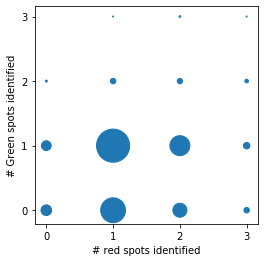

In [11]:
plotOccurence(STEDCLLst)
filterCLLst = selectSpotOccurence(STEDCLLst, [1], [1])

In [12]:
FRETCL = []
for loc in filterCLLst:
    FRETCL.append(df.analyseLoc(loc, Ggate = 29, Rgate = 29, Ygate = 29,
                                   winSigma = 3, framestop = 20,
                                  verbose = False))

header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_0_x_-50.0_y_-163.0.txt'
number of records is 34087
header dir already exists


K:\vanderVoortN\FRC\dev\GaussAnalysis\developmental_functions.py:249: RuntimeWarning: invalid value encountered in log
  return np.sum(func(xdata, *params) - ydata * np.log(func(xdata, *params)))


b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_1_x_-175.0_y_-129.0.txt'
number of records is 32495
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_2_x_18.0_y_-35.0.txt'
number of records is 33516
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_3_x_140.0_y_24.0.txt'
number of records is 32213
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_5_x_-141.0_y_165.0.txt'
number of records is 31587
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00037396_spot_9_x_121.0_y_181.0.txt'
number of records is 32577
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\

header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_0_x_24.0_y_-180.0.txt'
number of records is 37448
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_1_x_26.0_y_-179.0.txt'
number of records is 34623
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_2_x_-132.0_y_-108.0.txt'
number of records is 35026
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_3_x_-120.0_y_-15.0.txt'
number of records is 33878
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00043996_spot_5_x_24.0_y_149.0.txt'
number of records is 31827
header dir already exists
b'N:\\Singlem\\singlem20-1\

number of records is 31982
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00050596_spot_4_x_-21.0_y_66.0.txt'
number of records is 30843
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00050596_spot_8_x_69.0_y_138.0.txt'
number of records is 31096
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00050596_spot_9_x_69.0_y_142.0.txt'
number of records is 31302
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00050596_spot_10_x_-54.0_y_-44.0.txt'
number of records is 35129
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00052796_spot_0_x_96.0_y_-143.0.txt'
number of records is 33199
header dir already exists
b'N:

number of records is 34763
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00063796_spot_6_x_-53.0_y_135.0.txt'
number of records is 33968
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00063796_spot_7_x_144.0_y_142.0.txt'
number of records is 33923
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00063796_spot_8_x_144.0_y_144.0.txt'
number of records is 33333
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00063796_spot_12_x_-60.0_y_-135.0.txt'
number of records is 31271
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00063796_spot_13_x_-165.0_y_-130.0.txt'
number of records is 32599
header dir already exis

header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00068196_spot_40_x_-35.0_y_70.0.txt'
number of records is 31373
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00068196_spot_41_x_79.0_y_75.0.txt'
number of records is 30665
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00068196_spot_46_x_-102.0_y_113.0.txt'
number of records is 33214
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00068196_spot_50_x_-43.0_y_144.0.txt'
number of records is 31074
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00068196_spot_52_x_-83.0_y_146.0.txt'
number of records is 30933
header dir already exists
b'N:\\Singlem\\singlem20-1

header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_11_x_177.0_y_-183.0.txt'
number of records is 32375
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_12_x_192.0_y_-158.0.txt'
number of records is 31281
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_13_x_3.0_y_-145.0.txt'
number of records is 31195
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_19_x_-27.0_y_-108.0.txt'
number of records is 31081
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00074796_spot_22_x_-33.0_y_-77.0.txt'
number of records is 31556
header dir already exists
b'N:\\Singlem\\singlem

number of records is 31870
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_21_x_107.0_y_-158.0.txt'
number of records is 60461
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_25_x_-192.0_y_-150.0.txt'
number of records is 32569
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_46_x_-189.0_y_-125.0.txt'
number of records is 31685
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_48_x_-193.0_y_-122.0.txt'
number of records is 31263
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00083596_spot_50_x_-89.0_y_-28.0.txt'
number of records is 34178
header dir alrea

number of records is 30717
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_22_x_-166.0_y_-3.0.txt'
number of records is 31349
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_24_x_-165.0_y_-1.0.txt'
number of records is 31945
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_26_x_-18.0_y_20.0.txt'
number of records is 34795
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_28_x_-76.0_y_47.0.txt'
number of records is 31801
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00094596_spot_29_x_90.0_y_53.0.txt'
number of records is 32564
header dir already exists
b

K:\vanderVoortN\FRC\dev\GaussAnalysis\developmental_functions.py:249: RuntimeWarning: invalid value encountered in multiply
  return np.sum(func(xdata, *params) - ydata * np.log(func(xdata, *params)))



b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00096796_spot_15_x_73.0_y_-79.0.txt'
number of records is 35126
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00096796_spot_17_x_74.0_y_-75.0.txt'
number of records is 31626
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00096796_spot_18_x_-25.0_y_-72.0.txt'
number of records is 31359
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00096796_spot_21_x_-16.0_y_-47.0.txt'
number of records is 31193
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00096796_spot_22_x_-143.0_y_-45.0.txt'
number of records is 30924
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami

number of records is 31850
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00103396_spot_9_x_-169.0_y_189.0.txt'
number of records is 31972
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00103396_spot_13_x_-134.0_y_-184.0.txt'
number of records is 31453
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00103396_spot_14_x_95.0_y_-162.0.txt'
number of records is 31069
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00103396_spot_16_x_97.0_y_-160.0.txt'
number of records is 33474
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00103396_spot_17_x_-33.0_y_-159.0.txt'
number of records is 32438
header dir already e

number of records is 31164
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00107796_spot_24_x_-45.0_y_-88.0.txt'
number of records is 31687
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00107796_spot_25_x_-27.0_y_-88.0.txt'
number of records is 31652
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00107796_spot_26_x_44.0_y_-88.0.txt'
number of records is 31274
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00107796_spot_27_x_42.0_y_-87.0.txt'
number of records is 31505
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00107796_spot_29_x_-46.0_y_-85.0.txt'
number of records is 33571
header dir already exists

number of records is 32324
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00112196_spot_28_x_-131.0_y_51.0.txt'
number of records is 32496
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00112196_spot_30_x_-7.0_y_55.0.txt'
number of records is 33081
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00112196_spot_31_x_10.0_y_61.0.txt'
number of records is 32064
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00112196_spot_32_x_8.0_y_64.0.txt'
number of records is 30493
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00112196_spot_34_x_33.0_y_80.0.txt'
number of records is 31554
header dir already exists
b'N:\\

number of records is 31197
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_65_x_140.0_y_62.0.txt'
number of records is 31460
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_71_x_-183.0_y_87.0.txt'
number of records is 32993
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_72_x_-80.0_y_87.0.txt'
number of records is 33426
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_75_x_-165.0_y_155.0.txt'
number of records is 30821
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00116596_spot_78_x_-77.0_y_162.0.txt'
number of records is 32515
header dir already exist

K:\vanderVoortN\FRC\dev\GaussAnalysis\developmental_functions.py:249: RuntimeWarning: divide by zero encountered in log
  return np.sum(func(xdata, *params) - ydata * np.log(func(xdata, *params)))


number of records is 31650
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00118796_spot_46_x_152.0_y_20.0.txt'
number of records is 31558
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00118796_spot_48_x_-67.0_y_26.0.txt'
number of records is 32124
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00118796_spot_49_x_-67.0_y_28.0.txt'
number of records is 30698
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00118796_spot_52_x_-185.0_y_82.0.txt'
number of records is 32575
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00118796_spot_53_x_58.0_y_102.0.txt'
number of records is 35837
header dir already exists
b

number of records is 30557
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_27_x_78.0_y_-42.0.txt'
number of records is 34216
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_28_x_-168.0_y_-33.0.txt'
number of records is 32452
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_29_x_-166.0_y_-33.0.txt'
number of records is 33377
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_30_x_118.0_y_-22.0.txt'
number of records is 31211
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00013195999999999998_spot_33_x_9.0_y_-5

number of records is 31435
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00017595999999999996_spot_20_x_67.0_y_-111.0.txt'
number of records is 31813
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00017595999999999996_spot_21_x_-122.0_y_-82.0.txt'
number of records is 32225
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00017595999999999996_spot_22_x_120.0_y_-73.0.txt'
number of records is 31265
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00017595999999999996_spot_23_x_121.0_y_-71.0.txt'
number of records is 31252
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00017595999999999996_spot_28_x_89.0_y_-

number of records is 31617
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00019795999999999985_spot_60_x_13.0_y_154.0.txt'
number of records is 32478
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00019795999999999985_spot_61_x_-43.0_y_155.0.txt'
number of records is 32305
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00021995999999999995_spot_0_x_-174.0_y_-169.0.txt'
number of records is 34120
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00021995999999999995_spot_3_x_-161.0_y_4.0.txt'
number of records is 33587
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00021995999999999995_spot_4_x_120.0_y_110.

header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_24_x_-25.0_y_-102.0.txt'
number of records is 31137
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_25_x_-24.0_y_-99.0.txt'
number of records is 32547
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_26_x_-27.0_y_-98.0.txt'
number of records is 31593
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_27_x_4.0_y_-89.0.txt'
number of records is 31396
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.00026395999999999993_spot_28_x_3.0_y_-85.0.txt'
number of records is

number of records is 31473
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_31_x_53.0_y_-84.0.txt'
number of records is 31152
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_35_x_188.0_y_-63.0.txt'
number of records is 31155
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_43_x_-174.0_y_-21.0.txt'
number of records is 32969
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_44_x_-175.0_y_-18.0.txt'
number of records is 31647
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0002859599999999999_spot_45_x_-175.0_y_-16.

number of records is 31540
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003299599999999999_spot_38_x_37.0_y_66.0.txt'
number of records is 36472
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003299599999999999_spot_39_x_-184.0_y_94.0.txt'
number of records is 31805
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003299599999999999_spot_41_x_-76.0_y_142.0.txt'
number of records is 31759
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003299599999999999_spot_49_x_-88.0_y_172.0.txt'
number of records is 33224
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0003519599999999999_spot_9_x_-19.0_y_192.0.txt

number of records is 32761
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_5_x_-124.0_y_97.0.txt'
number of records is 32620
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_11_x_-130.0_y_-159.0.txt'
number of records is 32939
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_12_x_-190.0_y_-156.0.txt'
number of records is 32083
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_13_x_-188.0_y_-156.0.txt'
number of records is 31386
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005499599999999999_spot_15_x_179.0_y_-

number of records is 30875
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005939599999999999_spot_21_x_13.0_y_-61.0.txt'
number of records is 32844
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005939599999999999_spot_22_x_15.0_y_-61.0.txt'
number of records is 33871
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005939599999999999_spot_23_x_13.0_y_-58.0.txt'
number of records is 33534
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005939599999999999_spot_24_x_36.0_y_-1.0.txt'
number of records is 34026
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0005939599999999999_spot_25_x_40.0_y_-1.0.txt'
nu

number of records is 33414
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008579600000000001_spot_50_x_-163.0_y_123.0.txt'
number of records is 31240
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008579600000000001_spot_51_x_53.0_y_138.0.txt'
number of records is 32218
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008799599999999999_spot_11_x_-145.0_y_-169.0.txt'
number of records is 31979
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008799599999999999_spot_18_x_143.0_y_-135.0.txt'
number of records is 31709
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-0.0008799599999999999_spot_19_x_-11.0_y_-99

K:\vanderVoortN\FRC\dev\GaussAnalysis\developmental_functions.py:249: RuntimeWarning: invalid value encountered in subtract
  return np.sum(func(xdata, *params) - ydata * np.log(func(xdata, *params)))


number of records is 32267
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_36_x_-138.0_y_-11.0.txt'
number of records is 33677
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_37_x_-35.0_y_-5.0.txt'
number of records is 32256
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_39_x_-12.0_y_-3.0.txt'
number of records is 30519
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_40_x_-36.0_y_-2.0.txt'
number of records is 32939
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-2.1959999999999905e-05_spot_41_x_-121.0_y_3.

number of records is 32160
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_45_x_-15.0_y_50.0.txt'
number of records is 31726
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_47_x_35.0_y_93.0.txt'
number of records is 32119
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_50_x_75.0_y_116.0.txt'
number of records is 33490
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_51_x_61.0_y_117.0.txt'
number of records is 32498
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y4.000000000019613e-08_spot_52_x_84.0_y_124.0.txt'
number

number of records is 31225
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-4.3960000000000006e-05_spot_67_x_-57.0_y_180.0.txt'
number of records is 31973
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-6.595999999999989e-05_spot_4_x_-33.0_y_-45.0.txt'
number of records is 31935
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-6.595999999999989e-05_spot_5_x_134.0_y_51.0.txt'
number of records is 31402
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-6.595999999999989e-05_spot_6_x_145.0_y_72.0.txt'
number of records is 31958
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-6.595999999999989e-05_spot_13_x_-25.0_y_-160.0.txt

number of records is 34169
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_26_x_-19.0_y_-89.0.txt'
number of records is 30689
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_27_x_176.0_y_-89.0.txt'
number of records is 31526
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_29_x_177.0_y_-86.0.txt'
number of records is 31273
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_32_x_-81.0_y_-65.0.txt'
number of records is 31202
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\24_CL_origami_NV\\STED_run2\\all\\header\\allOverview_Pos_y-8.795999999999999e-05_spot_35_x_140.0_y_-46.0.

In [92]:
pxSize = 10
Gbg = []
Ybg = []
GA = []
YA = []
Gsigma = []
Ysigma = []
pseudoE = []
tauG = []
tauR = []
tauY = []
dist = []
for loc in FRETCL:
    Gbg.append(loc['G'].spotLst[0].bg)
    Ybg.append(loc['Y'].spotLst[0].bg)
    GA.append(loc['G'].spotLst[0].A * 2 * np.pi * loc['G'].spotLst[0].sigma)
    YA.append(loc['Y'].spotLst[0].A * 2 * np.pi * loc['Y'].spotLst[0].sigma)
    Gsigma.append(loc['G'].spotLst[0].sigma)
    Ysigma.append(loc['Y'].spotLst[0].sigma)
    pseudoE.append(loc['FRETind'][0].pseudoE)
    tauG.append(loc['FRETind'][0].tauG)
    tauR.append(loc['FRETind'][0].tauR)
    tauY.append(loc['FRETind'][0].tauY)
    dist.append(loc['FRETind'][0].dist)

In [93]:
outdir = r'K:\vanderVoortN\papers\STED-FRET\figOrigami'
outname = 'CL24Jan.pg4'
dist = (dist - np.mean(dist, axis = 0))*pxSize
distx = np.array(dist)[:,0]
disty = np.array(dist)[:,1]
distnorm = np.linalg.norm(dist,axis = 1)
savearray = np.array([np.array(pseudoE), np.array(tauG), np.array(tauR), np.array(tauY), +\
            distx, disty, distnorm]).transpose()

np.savetxt(os.path.join(outdir, outname), 
           savearray,
           fmt = '%.4f', 
           header = 'pseudoE\t tauG\t tauR\t tauY\t distx\t disty\t distnorm', 
           delimiter = '\t')

mean Green lifetime for C-L is 2.9
mean Red lifetime for C-L is 4.2
mean Yellow lifetime for C-L is 4.1


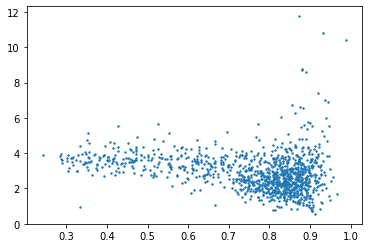

In [94]:
sample = 'C-L'
plt.scatter(pseudoE, tauG, s = 2)
print('mean Green lifetime for %s is %.1f' %(sample, np.mean(tauG)))
print('mean Red lifetime for %s is %.1f' %(sample, np.mean(tauR)))
print('mean Yellow lifetime for %s is %.1f' %(sample, np.mean(tauY)))

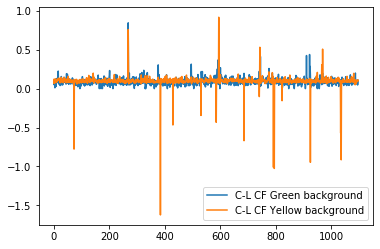

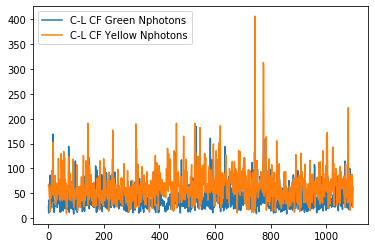

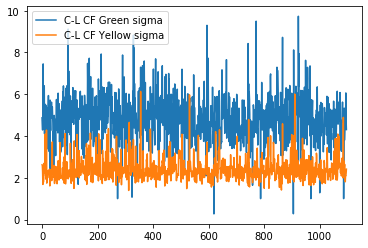

average photons in G: 40 
average photons in Y: 64
average sigma in G: 48.6 
average sigma in Y: 24.1
average bg in G: 0.09 
average bg in Y: 0.09


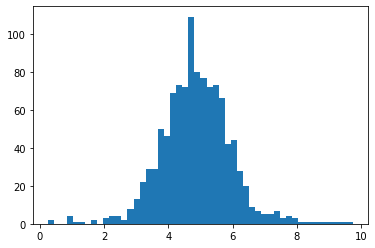

In [95]:
plt.plot(Gbg, label = 'C-L CF Green background')
plt.plot(Ybg, label = 'C-L CF Yellow background')
plt.legend()
plt.show()
plt.plot(GA, label = 'C-L CF Green Nphotons')
plt.plot(YA, label = 'C-L CF Yellow Nphotons')
plt.legend()
plt.show()
plt.plot(Gsigma, label = 'C-L CF Green sigma')
plt.plot(Ysigma, label = 'C-L CF Yellow sigma')
plt.legend()
plt.show()
print('average photons in G: %.0f \naverage photons in Y: %.0f' % (np.mean(GA), np.mean(YA)))
print('average sigma in G: %.1f \naverage sigma in Y: %.1f' % (np.mean(Gsigma) * pxSize, np.mean(Ysigma)*pxSize))
print('average bg in G: %.2f \naverage bg in Y: %.2f' % (np.mean(Gbg), np.mean(Ybg)))

_ = plt.hist(Gsigma, bins = 50)

In [96]:
Gprecision = np.sqrt(pF.findVar([0, 0, 48, 0.09, 40], 10))
print('standard deviation of G Channel is %.2f nm' % Gprecision)
Yprecision = np.sqrt(pF.findVar([0,0,24,0.09, 64], 10))
print('standard deviation of Y Channel is %.2f nm' % Yprecision)
posprecision = 2
print('uncertainty in dye position is assumed to be %.2f nm' % posprecision)
chiSigma = np.sqrt (Gprecision**2 + Yprecision**2 + posprecision**2)
print('expected sigma of chi distribution is %.2f nm' % chiSigma)

integral in variance has value -0.229977
standard deviation of G Channel is 8.65 nm
integral in variance has value -0.073950
standard deviation of Y Channel is 3.12 nm
uncertainty in dye position is assumed to be 2.00 nm
expected sigma of chi distribution is 9.41 nm


In [29]:
reload(df)

<module 'developmental_functions' from 'K:\\vanderVoortN\\FRC\\dev\\GaussAnalysis\\developmental_functions.py'>

standard deviation of spots is 12.00 and 11.71


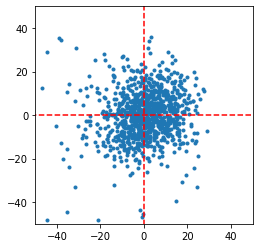

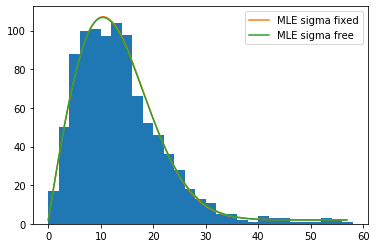

fit res if sigma fixed[   6.02073754    9.40859674 1792.31517478    2.04885508]
fit res if sigma free[5.45347750e-01 1.03873845e+01 1.79798112e+03 1.95230450e+00]


In [97]:
chiSigma = np.sqrt (Gprecision**2 + Yprecision**2 + posprecision**2)

coords = plotSinglePair(filterCLLst, pxSize = pxSize)
counts, bin_edges, _ = plt.hist(np.linalg.norm(coords, axis = 1), bins = np.arange(0,60,2))

Nbins = bin_edges.shape[0] - 1
bins = np.zeros(Nbins)
for i in range(Nbins):
    bins[i] = (bin_edges[i] + bin_edges[i + 1]) / 2
fixedbounds = ((0, None), (chiSigma, chiSigma), (None, None), (None, None))
params0 = [7, 7, 500,2]
fitres_fixed = minimize(logLikelihood1D, params0, args = (ncChidistr, bins, counts), 
                  method = 'SLSQP', bounds = fixedbounds)
xgrid = np.arange(0,max(bins),0.1)
fixedfit = ncChidistr(xgrid, *fitres_fixed.x)
plt.plot(xgrid, fixedfit, label = 'MLE sigma fixed')

freebounds = ((0, None), (None, None), (None, None), (None, None))
fitres_free = minimize(logLikelihood1D, params0, args = (ncChidistr, bins, counts), 
                  method = 'SLSQP', bounds = freebounds)
freefit = ncChidistr(xgrid, *fitres_free.x)
plt.plot(xgrid, freefit, label = 'MLE sigma free')
plt.legend()
plt.show()
print('fit res if sigma fixed' + str(fitres_fixed.x))
print('fit res if sigma free' + str(fitres_free.x))

In [205]:
np.sqrt(2*(6.13**2 + 2.62**2 + 2**2))

9.842895915328985

In [98]:
outdir = r'K:\vanderVoortN\papers\STED-FRET\figOrigami'
outname = 'CL24Jan_fits.pg4'
header = 'xgrid\t sigmafree\t sigmafixed'
savearray = np.array([xgrid, freefit, fixedfit]).transpose()

np.savetxt(os.path.join(outdir, outname), 
           savearray,
           fmt = '%.4f', 
           header = header, 
           delimiter = '\t')

fpath = os.path.join(outdir, outname[:-4] + '_fit_parameters.txt')
with open(fpath, 'wt') as f:
    f.write('freefit\n')
    f.write('mu, sigma, A, bg\n')
    f.write(str(fitres_free.x) + '\n')
    f.write(str(freebounds) + '\n')
    f.write('fixedfit\n')
    f.write('mu, sigma, A, bg\n')
    f.write(str(fitres_fixed.x) + '\n')
    f.write(str(fixedbounds) + '\n')

# STED C-R data

# merge PTU files

In [72]:
path = os.path.join(r'N:\Singlem\singlem20-1\January\25_CR_origami_NV\run2_STED', '')
savedir = os.path.join(path, 'all')
mergePTUfiles(path, savedir)

Overview_-0.00010995999999999988_numberSPOTS_65
Overview_-0.00013195999999999998_numberSPOTS_60
Overview_-0.00015395999999999986_numberSPOTS_69
Overview_-0.00017595999999999996_numberSPOTS_54
Overview_-0.00019795999999999985_numberSPOTS_62
Overview_-0.00021995999999999995_numberSPOTS_48
Overview_-0.00024195999999999994_numberSPOTS_66
Overview_-0.00026395999999999993_numberSPOTS_85
Overview_-0.0002859599999999999_numberSPOTS_63
Overview_-0.0003079599999999999_numberSPOTS_34
Overview_-0.0003299599999999999_numberSPOTS_51
Overview_-0.0003519599999999999_numberSPOTS_53
Overview_-0.00037396_numberSPOTS_42
Overview_-0.00039596_numberSPOTS_57
Overview_-0.00041796_numberSPOTS_73
Overview_-0.00043996_numberSPOTS_63
Overview_-0.00046196_numberSPOTS_53
Overview_-0.00048395999999999997_numberSPOTS_43
Overview_-0.00050596_numberSPOTS_13
Overview_-0.00052796_numberSPOTS_45
Overview_-0.0005499599999999999_numberSPOTS_64
Overview_-0.0005719599999999999_numberSPOTS_35
Overview_-0.0005939599999999999_nu

# Analyze data new

### analyze data new

In [6]:
from scipy.ndimage import gaussian_filter

In [108]:
wdir = r'N:\Singlem\singlem20-1\January\25_CR_origami_NV\run2_STED\all'
files = os.listdir(wdir)
options = optionsCluster(fitbg = 0, setbg = 0.2, ellipt_circ = 1)
STEDCRLst = []
analyseSTEDdir(
    STEDCRLst, options, wdir, files, Ggate = 29, Ygate = 29,
    DTwoIstar = 0.03, garbageBrightness = 20, junkIstar = 0.20, outname = 'STEDCR.spots')

analysing image no. 0
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_0_x_165.0_y_-196.0.txt'
number of records is 35602
analysing image no. 1
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_1_x_167.0_y_-196.0.txt'
number of records is 33113
analysing image no. 2
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_2_x_154.0_y_-95.0.txt'
number of records is 32857
analysing image no. 3
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_3_x_113.0_y_-64.0.txt'
number of records is 32558
ROI touches image borders, skipping
analysing image no. 4
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\

analysing image no. 37
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_36_x_109.0_y_-29.0.txt'
number of records is 31842
ROI touches image borders, skipping
analysing image no. 38
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_37_x_11.0_y_-14.0.txt'
number of records is 32522
analysing image no. 39
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_38_x_10.0_y_-12.0.txt'
number of records is 31706
analysing image no. 40
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_39_x_9.0_y_-10.0.txt'
number of records is 33519
analysing image no. 41
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\a

analysing image no. 76
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_75_x_122.0_y_97.0.txt'
number of records is 32228
analysing image no. 77
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_76_x_-56.0_y_101.0.txt'
number of records is 31122
ROI touches image borders, skipping
analysing image no. 78
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_77_x_-54.0_y_102.0.txt'
number of records is 31131
ROI touches image borders, skipping
analysing image no. 79
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_78_x_-54.0_y_104.0.txt'
number of records is 32665
analysing image no. 80
header dir already exists
b'N:\\Singlem\\singlem20-1\\

analysing image no. 112
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_111_x_173.0_y_-167.0.txt'
number of records is 30160
ROI touches image borders, skipping
analysing image no. 113
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_112_x_172.0_y_-165.0.txt'
number of records is 29384
ROI touches image borders, skipping
analysing image no. 114
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_113_x_174.0_y_-165.0.txt'
number of records is 30077
analysing image no. 115
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_114_x_184.0_y_-165.0.txt'
number of records is 29683
ROI touches image borders, skipping
analysing image no. 116
head

analysing image no. 148
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_19_x_143.0_y_-140.0.txt'
number of records is 31059
analysing image no. 149
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_20_x_182.0_y_-139.0.txt'
number of records is 30331
analysing image no. 150
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_21_x_187.0_y_-131.0.txt'
number of records is 32516
analysing image no. 151
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_22_x_-56.0_y_-109.0.txt'
number of records is 33745
analysing image no. 152
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview

analysing image no. 186
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_57_x_-160.0_y_100.0.txt'
number of records is 32710
analysing image no. 187
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_58_x_-161.0_y_102.0.txt'
number of records is 32029
analysing image no. 188
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_59_x_-159.0_y_102.0.txt'
number of records is 32008
analysing image no. 189
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_60_x_-91.0_y_103.0.txt'
number of records is 31054
analysing image no. 190
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_

analysing image no. 222
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00599176_spot_5_x_-144.0_y_32.0.txt'
number of records is 32330
analysing image no. 223
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00599176_spot_6_x_-34.0_y_66.0.txt'
number of records is 32278
analysing image no. 224
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00599176_spot_7_x_62.0_y_118.0.txt'
number of records is 30914
analysing image no. 225
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00599176_spot_8_x_124.0_y_131.0.txt'
number of records is 29952
ROI touches image borders, skipping
analysing image no. 226
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED

analysing image no. 260
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00599176_spot_43_x_87.0_y_-2.0.txt'
number of records is 31746
ROI touches image borders, skipping
analysing image no. 261
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00599176_spot_44_x_-188.0_y_4.0.txt'
number of records is 32948
analysing image no. 262
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00599176_spot_45_x_-81.0_y_8.0.txt'
number of records is 32958
analysing image no. 263
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00599176_spot_46_x_80.0_y_25.0.txt'
number of records is 31906
analysing image no. 264
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\

ROI touches image borders, skipping
analysing image no. 299
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00599176_spot_82_x_122.0_y_134.0.txt'
number of records is 29323
ROI touches image borders, skipping
analysing image no. 300
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00599176_spot_83_x_124.0_y_135.0.txt'
number of records is 31282
analysing image no. 301
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00599176_spot_84_x_110.0_y_157.0.txt'
number of records is 33940
analysing image no. 302
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00599176_spot_85_x_-157.0_y_158.0.txt'
number of records is 31610
analysing image no. 303
header dir already exists
b'N:\\Singlem\\single

analysing image no. 337
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_26_x_-40.0_y_-97.0.txt'
number of records is 32685
analysing image no. 338
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_27_x_-63.0_y_-90.0.txt'
number of records is 39333
analysing image no. 339
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_28_x_24.0_y_-85.0.txt'
number of records is 30916
analysing image no. 340
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_29_x_90.0_y_-68.0.txt'
number of records is 35509
analysing image no. 341
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y

analysing image no. 376
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_65_x_-15.0_y_123.0.txt'
number of records is 31750
analysing image no. 377
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_66_x_-15.0_y_125.0.txt'
number of records is 30445
analysing image no. 378
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_67_x_-16.0_y_127.0.txt'
number of records is 32144
analysing image no. 379
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_68_x_-64.0_y_138.0.txt'
number of records is 30417
analysing image no. 380
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos

analysing image no. 414
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_18_x_-159.0_y_-103.0.txt'
number of records is 30877
analysing image no. 415
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_19_x_3.0_y_-92.0.txt'
number of records is 32908
analysing image no. 416
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_20_x_-132.0_y_-71.0.txt'
number of records is 32219
analysing image no. 417
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_21_x_-134.0_y_-70.0.txt'
number of records is 31667
analysing image no. 418
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_P

analysing image no. 452
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_56_x_98.0_y_115.0.txt'
number of records is 31794
analysing image no. 453
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_57_x_96.0_y_116.0.txt'
number of records is 31223
analysing image no. 454
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_58_x_-15.0_y_119.0.txt'
number of records is 31323
analysing image no. 455
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_59_x_47.0_y_137.0.txt'
number of records is 31429
analysing image no. 456
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-

analysing image no. 490
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00605776_spot_26_x_-129.0_y_-69.0.txt'
number of records is 32114
analysing image no. 491
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00605776_spot_27_x_81.0_y_-60.0.txt'
number of records is 31151
analysing image no. 492
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00605776_spot_28_x_-108.0_y_-53.0.txt'
number of records is 31710
analysing image no. 493
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00605776_spot_29_x_28.0_y_-12.0.txt'
number of records is 30093
analysing image no. 494
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos

analysing image no. 529
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00605776_spot_65_x_17.0_y_172.0.txt'
number of records is 31412
analysing image no. 530
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_0_x_19.0_y_-179.0.txt'
number of records is 34870
analysing image no. 531
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_1_x_-79.0_y_-172.0.txt'
number of records is 32930
analysing image no. 532
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_2_x_168.0_y_-144.0.txt'
number of records is 33364
analysing image no. 533
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y

analysing image no. 568
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_38_x_-85.0_y_-54.0.txt'
number of records is 31463
analysing image no. 569
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_39_x_-165.0_y_-50.0.txt'
number of records is 36411
analysing image no. 570
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_40_x_-188.0_y_-47.0.txt'
number of records is 35148
analysing image no. 571
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_41_x_-189.0_y_-43.0.txt'
number of records is 34270
analysing image no. 572
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_

analysing image no. 606
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_76_x_-60.0_y_99.0.txt'
number of records is 30991
analysing image no. 607
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_77_x_58.0_y_109.0.txt'
number of records is 31068
analysing image no. 608
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_78_x_-47.0_y_119.0.txt'
number of records is 31647
analysing image no. 609
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_79_x_-48.0_y_121.0.txt'
number of records is 31305
analysing image no. 610
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y

analysing image no. 645
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00610176_spot_16_x_-151.0_y_-119.0.txt'
number of records is 38856
analysing image no. 646
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00610176_spot_17_x_116.0_y_-118.0.txt'
number of records is 37282
analysing image no. 647
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00610176_spot_18_x_60.0_y_-117.0.txt'
number of records is 35808
analysing image no. 648
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00610176_spot_19_x_61.0_y_-117.0.txt'
number of records is 36082
analysing image no. 649
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_

analysing image no. 682
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00610176_spot_53_x_161.0_y_43.0.txt'
number of records is 30387
analysing image no. 683
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00610176_spot_54_x_0.0_y_76.0.txt'
number of records is 32530
analysing image no. 684
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00610176_spot_55_x_0.0_y_78.0.txt'
number of records is 29369
analysing image no. 685
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00610176_spot_56_x_-156.0_y_83.0.txt'
number of records is 32414
analysing image no. 686
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00

analysing image no. 720
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00612376_spot_19_x_20.0_y_-128.0.txt'
number of records is 32584
analysing image no. 721
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00612376_spot_20_x_21.0_y_-111.0.txt'
number of records is 30995
analysing image no. 722
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00612376_spot_21_x_21.0_y_-109.0.txt'
number of records is 30446
ROI touches image borders, skipping
analysing image no. 723
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00612376_spot_22_x_22.0_y_-108.0.txt'
number of records is 30544
analysing image no. 724
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run

analysing image no. 759
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00612376_spot_58_x_-156.0_y_15.0.txt'
number of records is 36183
analysing image no. 760
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00612376_spot_59_x_-194.0_y_17.0.txt'
number of records is 34660
ROI touches image borders, skipping
analysing image no. 761
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00612376_spot_60_x_125.0_y_24.0.txt'
number of records is 30774
analysing image no. 762
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00612376_spot_61_x_124.0_y_27.0.txt'
number of records is 29997
analysing image no. 763
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_

analysing image no. 797
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_11_x_130.0_y_-178.0.txt'
number of records is 34307
analysing image no. 798
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_12_x_165.0_y_-147.0.txt'
number of records is 34269
analysing image no. 799
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_13_x_164.0_y_-145.0.txt'
number of records is 31998
analysing image no. 800
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_14_x_95.0_y_-143.0.txt'
number of records is 32990
analysing image no. 801
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_

analysing image no. 835
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_49_x_-6.0_y_13.0.txt'
number of records is 30336
analysing image no. 836
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_50_x_-165.0_y_15.0.txt'
number of records is 32524
analysing image no. 837
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_51_x_-6.0_y_15.0.txt'
number of records is 31215
analysing image no. 838
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_52_x_117.0_y_15.0.txt'
number of records is 31028
analysing image no. 839
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.

analysing image no. 873
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_87_x_78.0_y_162.0.txt'
number of records is 31079
analysing image no. 874
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_88_x_76.0_y_163.0.txt'
number of records is 31284
analysing image no. 875
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_89_x_92.0_y_164.0.txt'
number of records is 31517
analysing image no. 876
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_90_x_-140.0_y_166.0.txt'
number of records is 31686
analysing image no. 877
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y

analysing image no. 911
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_22_x_-23.0_y_-126.0.txt'
number of records is 33773
analysing image no. 912
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_23_x_-24.0_y_-124.0.txt'
number of records is 33265
analysing image no. 913
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_24_x_-22.0_y_-124.0.txt'
number of records is 32548
analysing image no. 914
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_25_x_-199.0_y_-123.0.txt'
number of records is 31287
analysing image no. 915
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOvervie

analysing image no. 949
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_60_x_12.0_y_44.0.txt'
number of records is 31554
analysing image no. 950
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_61_x_-74.0_y_61.0.txt'
number of records is 31476
analysing image no. 951
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_62_x_-73.0_y_63.0.txt'
number of records is 30158
analysing image no. 952
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_63_x_92.0_y_66.0.txt'
number of records is 29996
analysing image no. 953
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.0

number of records is 32030
analysing image no. 988
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_4_x_197.0_y_-86.0.txt'
number of records is 34508
analysing image no. 989
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_5_x_143.0_y_-19.0.txt'
number of records is 32485
analysing image no. 990
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_6_x_31.0_y_68.0.txt'
number of records is 31952
analysing image no. 991
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_7_x_-27.0_y_96.0.txt'
number of records is 30764
analysing image no. 992
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\hea

analysing image no. 1026
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_42_x_187.0_y_-78.0.txt'
number of records is 31905
analysing image no. 1027
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_43_x_-98.0_y_-50.0.txt'
number of records is 31995
analysing image no. 1028
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_44_x_-166.0_y_-45.0.txt'
number of records is 34843
analysing image no. 1029
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_45_x_-166.0_y_-42.0.txt'
number of records is 34835
analysing image no. 1030
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverv

analysing image no. 1064
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_80_x_30.0_y_136.0.txt'
number of records is 35672
analysing image no. 1065
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_81_x_-180.0_y_147.0.txt'
number of records is 31818
analysing image no. 1066
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_82_x_21.0_y_155.0.txt'
number of records is 31207
analysing image no. 1067
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_83_x_18.0_y_156.0.txt'
number of records is 30725
analysing image no. 1068
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_

analysing image no. 1102
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_25_x_191.0_y_-81.0.txt'
number of records is 35178
analysing image no. 1103
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_26_x_193.0_y_-81.0.txt'
number of records is 32605
analysing image no. 1104
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_27_x_-64.0_y_-71.0.txt'
number of records is 32183
analysing image no. 1105
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_28_x_-64.0_y_-68.0.txt'
number of records is 31668
analysing image no. 1106
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOvervie

analysing image no. 1140
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_63_x_-89.0_y_103.0.txt'
number of records is 31458
analysing image no. 1141
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_64_x_129.0_y_104.0.txt'
number of records is 30527
analysing image no. 1142
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_65_x_-88.0_y_106.0.txt'
number of records is 31884
analysing image no. 1143
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_66_x_-90.0_y_108.0.txt'
number of records is 29661
analysing image no. 1144
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOvervie

analysing image no. 1178
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00623376_spot_8_x_-146.0_y_183.0.txt'
number of records is 31829
analysing image no. 1179
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00623376_spot_9_x_-146.0_y_185.0.txt'
number of records is 32215
analysing image no. 1180
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00623376_spot_10_x_-16.0_y_-168.0.txt'
number of records is 31974
analysing image no. 1181
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00623376_spot_11_x_-15.0_y_-167.0.txt'
number of records is 31551
analysing image no. 1182
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverv

analysing image no. 1216
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00623376_spot_46_x_-63.0_y_20.0.txt'
number of records is 31500
analysing image no. 1217
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00623376_spot_47_x_-60.0_y_21.0.txt'
number of records is 33103
analysing image no. 1218
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00623376_spot_48_x_-63.0_y_22.0.txt'
number of records is 35553
analysing image no. 1219
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00623376_spot_49_x_121.0_y_23.0.txt'
number of records is 33853
analysing image no. 1220
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Po

analysing image no. 1255
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00625576_spot_10_x_-86.0_y_-150.0.txt'
number of records is 32989
analysing image no. 1256
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00625576_spot_11_x_165.0_y_-129.0.txt'
number of records is 32592
analysing image no. 1257
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00625576_spot_12_x_174.0_y_-125.0.txt'
number of records is 31577
analysing image no. 1258
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00625576_spot_13_x_171.0_y_-124.0.txt'
number of records is 30794
analysing image no. 1259
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOve

analysing image no. 1293
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00625576_spot_48_x_-92.0_y_29.0.txt'
number of records is 32058
analysing image no. 1294
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00625576_spot_49_x_-94.0_y_31.0.txt'
number of records is 31569
analysing image no. 1295
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00625576_spot_50_x_14.0_y_47.0.txt'
number of records is 31352
analysing image no. 1296
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00625576_spot_51_x_15.0_y_48.0.txt'
number of records is 32734
analysing image no. 1297
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_

analysing image no. 1331
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_11_x_-21.0_y_-126.0.txt'
number of records is 31799
analysing image no. 1332
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_12_x_40.0_y_-124.0.txt'
number of records is 31940
analysing image no. 1333
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_13_x_-40.0_y_-114.0.txt'
number of records is 31524
analysing image no. 1334
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_14_x_-40.0_y_-110.0.txt'
number of records is 31318
analysing image no. 1335
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOver

number of records is 29356
analysing image no. 1371
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_51_x_-9.0_y_77.0.txt'
number of records is 40917
analysing image no. 1372
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_52_x_-119.0_y_86.0.txt'
number of records is 38833
analysing image no. 1373
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_53_x_-121.0_y_87.0.txt'
number of records is 36998
analysing image no. 1374
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_54_x_-119.0_y_89.0.txt'
number of records is 32629
analysing image no. 1375
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED

analysing image no. 1409
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00629976_spot_24_x_-6.0_y_-71.0.txt'
number of records is 32061
analysing image no. 1410
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00629976_spot_25_x_16.0_y_-67.0.txt'
number of records is 31149
analysing image no. 1411
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00629976_spot_26_x_-195.0_y_-62.0.txt'
number of records is 44142
analysing image no. 1412
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00629976_spot_27_x_-197.0_y_-60.0.txt'
number of records is 31808
analysing image no. 1413
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOvervie

number of records is 33648
analysing image no. 1448
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_11_x_-111.0_y_-179.0.txt'
number of records is 33234
analysing image no. 1449
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_12_x_-110.0_y_-179.0.txt'
number of records is 32447
analysing image no. 1450
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_13_x_160.0_y_-175.0.txt'
number of records is 32010
analysing image no. 1451
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_14_x_42.0_y_-99.0.txt'
number of records is 32158
analysing image no. 1452
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run

analysing image no. 1486
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_49_x_-167.0_y_128.0.txt'
number of records is 36590
analysing image no. 1487
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_50_x_90.0_y_152.0.txt'
number of records is 31692
analysing image no. 1488
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_51_x_92.0_y_152.0.txt'
number of records is 31307
analysing image no. 1489
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_52_x_-66.0_y_156.0.txt'
number of records is 31141
analysing image no. 1490
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview

not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu f

not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu file, skipping
not a .ptu f

[{'filepath': 'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\allOverview_Pos_y-0.00594776_spot_0_x_165.0_y_-196.0.ptu',
  'ROI': array([35, 42, 65, 72]),
  'G': <GaussAnalysisPipeline.Channel at 0x188bc1b9d48>,
  'Y': <GaussAnalysisPipeline.Channel at 0x188bc165fc8>},
 {'filepath': 'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\allOverview_Pos_y-0.00594776_spot_1_x_167.0_y_-196.0.ptu',
  'ROI': array([34, 25, 64, 55]),
  'G': <GaussAnalysisPipeline.Channel at 0x188bc1681c8>,
  'Y': <GaussAnalysisPipeline.Channel at 0x188bc1c0d48>},
 {'filepath': 'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\allOverview_Pos_y-0.00594776_spot_2_x_154.0_y_-95.0.ptu',
  'ROI': array([48, 37, 78, 67]),
  'G': <GaussAnalysisPipeline.Channel at 0x188bc14de48>,
  'Y': <GaussAnalysisPipeline.Channel at 0x188bc14d508>},
 {'filepath': 'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\allOverview_Pos_y-0.00594776_spot_5_x_103

### load previously processed data

In [31]:
wdir = r'N:\Singlem\singlem20-1\January\25_CR_origami_NV\run2_STED\all'
fpath = os.path.join(wdir, 'STEDCR.spots')
with open(fpath, 'rb') as spotsfile:
    STEDCRLst = pickle.load(spotsfile)

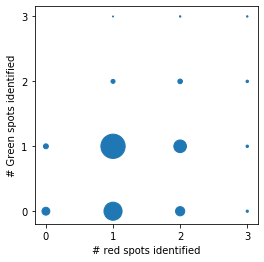

In [36]:
plotOccurence(STEDCRLst)
filterCRLst = selectSpotOccurence(STEDCRLst, [1], [1])

In [37]:
reload(df)

<module 'developmental_functions' from 'K:\\vanderVoortN\\FRC\\dev\\GaussAnalysis\\developmental_functions.py'>

In [57]:
FRETCR = []
for loc in filterCRLst:
    FRETCR.append(df.analyseLoc(loc, Ggate = 29, Rgate = 29, Ygate = 29,
                                   winSigma = 3, framestop = 20,
                                  verbose = False))

header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_0_x_165.0_y_-196.0.txt'
number of records is 35602
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_24_x_106.0_y_-85.0.txt'
number of records is 32805
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_25_x_109.0_y_-82.0.txt'
number of records is 33365
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_52_x_14.0_y_37.0.txt'
number of records is 35133
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00594776_spot_64_x_38.0_y_78.0.txt'
number of records is 34818
header dir already exists
b'N:\\Singlem\\singlem20-1\\

number of records is 32029
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_59_x_-159.0_y_102.0.txt'
number of records is 32008
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_60_x_-91.0_y_103.0.txt'
number of records is 31054
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_61_x_-28.0_y_108.0.txt'
number of records is 33638
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_71_x_-33.0_y_124.0.txt'
number of records is 32800
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00596976_spot_81_x_114.0_y_170.0.txt'
number of records is 33977
header dir already exi

header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_0_x_189.0_y_-192.0.txt'
number of records is 33955
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_1_x_-175.0_y_-179.0.txt'
number of records is 31573
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_2_x_43.0_y_-124.0.txt'
number of records is 35065
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_3_x_92.0_y_-67.0.txt'
number of records is 35265
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00601376_spot_4_x_-157.0_y_4.0.txt'
number of records is 31666
header dir already exists
b'N:\\Singlem\\singlem20-1\\

header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_13_x_145.0_y_-158.0.txt'
number of records is 31690
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_17_x_-150.0_y_-118.0.txt'
number of records is 31604
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_18_x_-159.0_y_-103.0.txt'
number of records is 30877
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_19_x_3.0_y_-92.0.txt'
number of records is 32908
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00603576_spot_24_x_98.0_y_-47.0.txt'
number of records is 31383
header dir already exists
b'N:\\Singlem\\singlem

number of records is 31810
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00605776_spot_47_x_135.0_y_81.0.txt'
number of records is 32562
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00605776_spot_52_x_-167.0_y_135.0.txt'
number of records is 32767
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00605776_spot_65_x_17.0_y_172.0.txt'
number of records is 31412
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_0_x_19.0_y_-179.0.txt'
number of records is 34870
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_1_x_-79.0_y_-172.0.txt'
number of records is 32930
header dir already exists

header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_74_x_-59.0_y_97.0.txt'
number of records is 32739
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_79_x_-48.0_y_121.0.txt'
number of records is 31305
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_80_x_16.0_y_122.0.txt'
number of records is 31557
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_81_x_-61.0_y_125.0.txt'
number of records is 30226
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00607976_spot_82_x_-64.0_y_126.0.txt'
number of records is 32120
header dir already exists
b'N:\\Singlem\\singlem20-1

number of records is 31205
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00610176_spot_71_x_-173.0_y_165.0.txt'
number of records is 33309
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00612376_spot_3_x_-122.0_y_-63.0.txt'
number of records is 32530
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00612376_spot_4_x_-20.0_y_-46.0.txt'
number of records is 31069
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00612376_spot_7_x_-155.0_y_96.0.txt'
number of records is 34191
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00612376_spot_8_x_-4.0_y_162.0.txt'
number of records is 31712
header dir already exists


number of records is 31215
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_25_x_44.0_y_-41.0.txt'
number of records is 31521
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_27_x_-91.0_y_-37.0.txt'
number of records is 31435
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_31_x_-185.0_y_-33.0.txt'
number of records is 31023
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_33_x_139.0_y_-33.0.txt'
number of records is 32245
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00614576_spot_35_x_173.0_y_-32.0.txt'
number of records is 33112
header dir already exis

number of records is 33359
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_36_x_-149.0_y_-81.0.txt'
number of records is 31144
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_40_x_82.0_y_-73.0.txt'
number of records is 31614
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_41_x_-22.0_y_-72.0.txt'
number of records is 31189
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_42_x_61.0_y_-72.0.txt'
number of records is 32520
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00616776_spot_43_x_82.0_y_-71.0.txt'
number of records is 31487
header dir already exists

header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_34_x_92.0_y_-93.0.txt'
number of records is 34671
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_36_x_-193.0_y_-91.0.txt'
number of records is 31428
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_37_x_-193.0_y_-89.0.txt'
number of records is 34188
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_39_x_148.0_y_-89.0.txt'
number of records is 31096
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00618976_spot_41_x_97.0_y_-79.0.txt'
number of records is 31152
header dir already exists
b'N:\\Singlem\\singlem20

header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_49_x_-153.0_y_16.0.txt'
number of records is 31286
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_52_x_125.0_y_26.0.txt'
number of records is 31288
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_53_x_123.0_y_27.0.txt'
number of records is 31611
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_54_x_125.0_y_28.0.txt'
number of records is 31470
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00621176_spot_60_x_-43.0_y_68.0.txt'
number of records is 32968
header dir already exists
b'N:\\Singlem\\singlem20-1\\

header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00623376_spot_70_x_46.0_y_162.0.txt'
number of records is 31804
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00623376_spot_71_x_-191.0_y_163.0.txt'
number of records is 31784
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00623376_spot_73_x_44.0_y_166.0.txt'
number of records is 33994
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00623376_spot_74_x_47.0_y_167.0.txt'
number of records is 32743
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00625576_spot_0_x_-63.0_y_-183.0.txt'
number of records is 34302
header dir already exists
b'N:\\Singlem\\singlem20-1

number of records is 33934
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_41_x_93.0_y_51.0.txt'
number of records is 31825
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_48_x_-34.0_y_66.0.txt'
number of records is 31468
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_57_x_-3.0_y_99.0.txt'
number of records is 32446
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_58_x_-127.0_y_104.0.txt'
number of records is 32447
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00627776_spot_59_x_-127.0_y_106.0.txt'
number of records is 31661
header dir already exists


number of records is 31788
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_33_x_-37.0_y_-4.0.txt'
number of records is 31022
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_34_x_-35.0_y_-4.0.txt'
number of records is 31956
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_44_x_-17.0_y_113.0.txt'
number of records is 31456
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_47_x_25.0_y_119.0.txt'
number of records is 30912
header dir already exists
b'N:\\Singlem\\singlem20-1\\January\\25_CR_origami_NV\\run2_STED\\all\\header\\allOverview_Pos_y-0.00632176_spot_48_x_24.0_y_121.0.txt'
number of records is 38512
header dir already exists
b

In [58]:
pxSize = 10
Gbg = []
Ybg = []
GA = []
YA = []
Gsigma = []
Ysigma = []
pseudoE = []
tauG = []
tauR = []
tauY = []
dist = []
for loc in FRETCR:
    Gbg.append(loc['G'].spotLst[0].bg)
    Ybg.append(loc['Y'].spotLst[0].bg)
    GA.append(loc['G'].spotLst[0].A * 2 * np.pi * loc['G'].spotLst[0].sigma)
    YA.append(loc['Y'].spotLst[0].A * 2 * np.pi * loc['Y'].spotLst[0].sigma)
    Gsigma.append(loc['G'].spotLst[0].sigma)
    Ysigma.append(loc['Y'].spotLst[0].sigma)
    pseudoE.append(loc['FRETind'][0].pseudoE)
    tauG.append(loc['FRETind'][0].tauG)
    tauR.append(loc['FRETind'][0].tauR)
    tauY.append(loc['FRETind'][0].tauY)
    dist.append(loc['FRETind'][0].dist)

In [59]:
outdir = r'K:\vanderVoortN\papers\STED-FRET\figOrigami'
outname = 'CR25Jan.pg4'
dist = (dist - np.mean(dist, axis = 0))*pxSize
distx = np.array(dist)[:,0]
disty = np.array(dist)[:,1]
distnorm = np.linalg.norm(dist,axis = 1)
savearray = np.array([np.array(pseudoE), np.array(tauG), np.array(tauR), np.array(tauY), +\
            distx, disty, distnorm]).transpose()

np.savetxt(os.path.join(outdir, outname), 
           savearray,
           fmt = '%.4f', 
           header = 'pseudoE\t tauG\t tauR\t tauY\t distx\t disty\t distnorm', 
           delimiter = '\t')

mean Green lifetime for C-R is 3.6
mean Red lifetime for C-R is 3.9
mean Yellow lifetime for C-R is 3.9


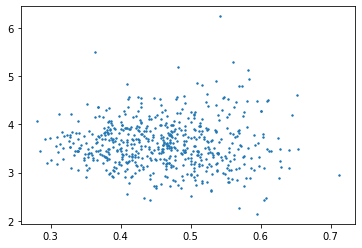

In [187]:
sample = 'C-R'
plt.scatter(pseudoE, tauG, s = 2)
print('mean Green lifetime for %s is %.1f' %(sample, np.mean(tauG)))
print('mean Red lifetime for %s is %.1f' %(sample, np.mean(tauR)))
print('mean Yellow lifetime for %s is %.1f' %(sample, np.mean(tauY)))

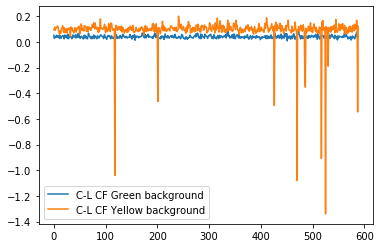

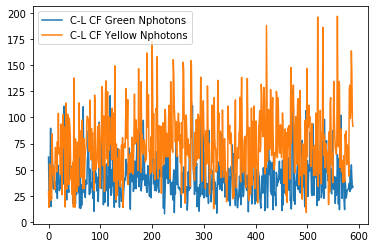

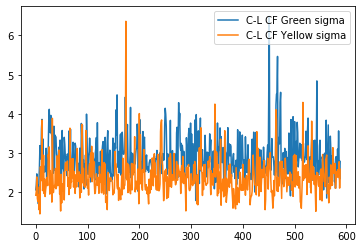

average photons in G: 42 
average photons in Y: 75
average sigma in G: 29.1 
average sigma in Y: 23.8
average bg in G: 0.04 
average bg in Y: 0.09


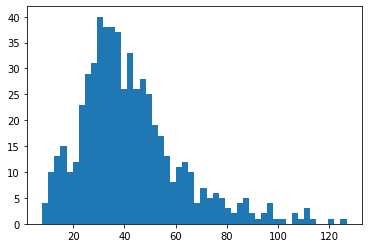

In [188]:
plt.plot(Gbg, label = 'C-L CF Green background')
plt.plot(Ybg, label = 'C-L CF Yellow background')
plt.legend()
plt.show()
plt.plot(GA, label = 'C-L CF Green Nphotons')
plt.plot(YA, label = 'C-L CF Yellow Nphotons')
plt.legend()
plt.show()
plt.plot(Gsigma, label = 'C-L CF Green sigma')
plt.plot(Ysigma, label = 'C-L CF Yellow sigma')
plt.legend()
plt.show()
print('average photons in G: %.0f \naverage photons in Y: %.0f' % (np.mean(GA), np.mean(YA)))
print('average sigma in G: %.1f \naverage sigma in Y: %.1f' % (np.mean(Gsigma) * pxSize, np.mean(Ysigma)*pxSize))
print('average bg in G: %.2f \naverage bg in Y: %.2f' % (np.mean(Gbg), np.mean(Ybg)))

_ = plt.hist(GA, bins = 50)

In [89]:
Gprecision = np.sqrt(pF.findVar([0,0,27,0.05, 41], 10))
print('standard deviation of G Channel is %.2f nm' % Gprecision)
Yprecision = np.sqrt(pF.findVar([0,0,22,0.1, 70], 10))
print('standard deviation of Y Channel is %.2f nm' % Yprecision)
posprecision = 2
print('uncertainty in dye position is assumed to be %.2f nm' % posprecision)
chiSigma = np.sqrt (Gprecision**2 + Yprecision**2 + posprecision**2)
print('expected sigma of chi distribution is %.2f nm' % chiSigma)

integral in variance has value -0.052880
standard deviation of G Channel is 4.33 nm
integral in variance has value -0.071384
standard deviation of Y Channel is 2.73 nm
uncertainty in dye position is assumed to be 2.00 nm
expected sigma of chi distribution is 5.50 nm


standard deviation of spots is 15.33 and 13.33


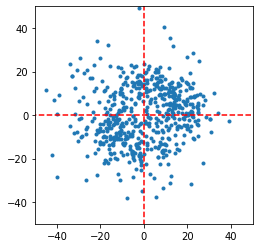

array([  16.17797278,    7.26527575, 1029.59462596,    1.51882861])

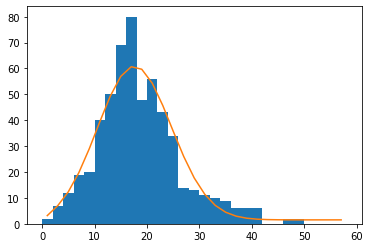

In [56]:
coords = plotSinglePair(filterCRLst, pxSize = pxSize)
counts, bin_edges, _ = plt.hist(np.linalg.norm(coords, axis = 1), bins = np.arange(0,60,2))
Nbins = bin_edges.shape[0] - 1
bins = np.zeros(Nbins)
for i in range(Nbins):
    bins[i] = (bin_edges[i] + bin_edges[i + 1]) / 2
params0 = [15,3, 500, 10]
bounds = ((None, None), (chiSigma, chiSigma), (None, None), (None, None))
fitres = minimize(logLikelihood1D, params0, args = (ncChidistr, bins, counts), 
                  method = 'SLSQP', bounds = bounds)
plt.plot(bins, ncChidistr(bins, *fitres.x))
fitres.x

standard deviation of spots is 15.33 and 13.33


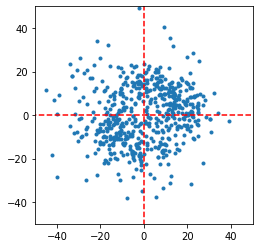

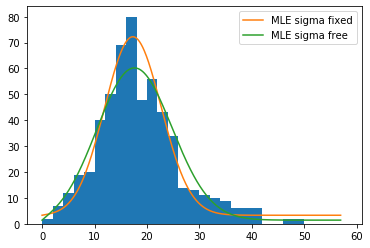

fit res if sigma fixed[ 16.45454805   5.50718101 926.19636154   3.30574469]
fit res if sigma free[  16.15182889    7.39099068 1035.60285614    1.41566398]


In [90]:
chiSigma = np.sqrt (Gprecision**2 + Yprecision**2 + posprecision**2)

coords = plotSinglePair(filterCRLst, pxSize = pxSize)
counts, bin_edges, _ = plt.hist(np.linalg.norm(coords, axis = 1), bins = np.arange(0,60,2))

Nbins = bin_edges.shape[0] - 1
bins = np.zeros(Nbins)
for i in range(Nbins):
    bins[i] = (bin_edges[i] + bin_edges[i + 1]) / 2
    
fixedbounds = ((0, None), (chiSigma, chiSigma+0.01), (None, None), (None, None))
params0 = [16, 7, 500,2]
fitres_fixed = minimize(logLikelihood1D, params0, args = (ncChidistr, bins, counts), 
                  method = 'SLSQP', bounds = fixedbounds)
xgrid = np.arange(0,max(bins),0.1)
fixedfit = ncChidistr(xgrid, *fitres_fixed.x)
plt.plot(xgrid, fixedfit, label = 'MLE sigma fixed')

freebounds = ((0, None), (None, None), (None, None), (None, None))
fitres_free = minimize(logLikelihood1D, params0, args = (ncChidistr, bins, counts), 
                  method = 'SLSQP', bounds = freebounds)
freefit = ncChidistr(xgrid, *fitres_free.x)
plt.plot(xgrid, freefit, label = 'MLE sigma free')
plt.legend()
plt.show()
print('fit res if sigma fixed' + str(fitres_fixed.x))
print('fit res if sigma free' + str(fitres_free.x))

In [206]:
len(xgrid)

485

In [91]:
outdir = r'K:\vanderVoortN\papers\STED-FRET\figOrigami'
outname = 'CR25Jan_fits.pg4'
header = 'xgrid\t sigmafree\t sigmafixed'
savearray = np.array([xgrid, freefit, fixedfit]).transpose()

np.savetxt(os.path.join(outdir, outname), 
           savearray,
           fmt = '%.4f', 
           header = header, 
           delimiter = '\t')

fpath = os.path.join(outdir, outname[:-4] + '_fit_parameters.txt')
print(fpath)
with open(fpath, 'wt') as f:
    f.write('freefit\n')
    f.write('mu, sigma, A, bg\n')
    f.write(str(fitres_free.x) + '\n')
    f.write(str(freebounds) + '\n')
    f.write('fixedfit\n')
    f.write('mu, sigma, A, bg\n')
    f.write(str(fitres_fixed.x) + '\n')
    f.write(str(fixedbounds) + '\n')

K:\vanderVoortN\papers\STED-FRET\figOrigami\CR25Jan_fits_fit_parameters.txt


In [199]:
Nruns = 500
xgrid = np.arange(50) + 0.5
params = [14, 5, 500, 2]
model = ncChidistr(xgrid, *params)
optParams = np.zeros([Nruns, len(params)])
for run in range(Nruns):
    data = np.random.poisson(model)
    params0 = params * (0.8 + 0.4 * np.random.random(len(params)))
    optParams[run] = minimize(logLikelihood1D, params0, args = (ncChidistr, xgrid, data), 
                  method = 'SLSQP',
                  options = {'maxiter':10000,'maxfev':10000, 'fatol':1e-5}).x
    if(run % 10 == 0):
        print('finished run %i' % run)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: OptimizeWarning: Unknown solver options: maxfev, fatol
  # This is added back by InteractiveShellApp.init_path()
K:\vanderVoortN\FRC\dev\GaussAnalysis\developmental_functions.py:243: RuntimeWarning: invalid value encountered in multiply
  else:


finished run 0
finished run 10
finished run 20
finished run 30
finished run 40
finished run 50
finished run 60
finished run 70
finished run 80
finished run 90
finished run 100
finished run 110


K:\vanderVoortN\FRC\dev\GaussAnalysis\developmental_functions.py:241: RuntimeWarning: invalid value encountered in subtract
  len(locLst_copy[i]['Y'].spotLst) in Yspots):


finished run 120
finished run 130
finished run 140
finished run 150
finished run 160
finished run 170
finished run 180
finished run 190
finished run 200
finished run 210
finished run 220
finished run 230
finished run 240
finished run 250
finished run 260
finished run 270
finished run 280
finished run 290
finished run 300
finished run 310
finished run 320
finished run 330
finished run 340
finished run 350
finished run 360
finished run 370
finished run 380
finished run 390
finished run 400
finished run 410
finished run 420
finished run 430
finished run 440
finished run 450
finished run 460
finished run 470
finished run 480
finished run 490


In [239]:
print('mu was modelled to be %.2f and found to be %.2f \u00B1 %.2f' % 
      (params[0], np.mean(optParams[:,0]), np.std(optParams[:,0])))
print('sigma was modelled to be %.2f and found to be %.2f \u00B1 %.2f' % 
      (params[1], np.mean(optParams[:,1]), np.std(optParams[:,1])))
print('Amplitude was modelled to be %.0f and found to be %.0f \u00B1 %.0f' % 
      (params[2], np.mean(optParams[:,2]), np.std(optParams[:,2])))
print('offset was modelled to be %.2f and found to be %.2f \u00B1 %.2f' % 
      (params[3], np.mean(optParams[:,3]), np.std(optParams[:,3])))

mu was modelled to be 14.00 and found to be 13.99 ± 0.27
sigma was modelled to be 5.00 and found to be 5.00 ± 0.23
Amplitude was modelled to be 500 and found to be 502 ± 24
offset was modelled to be 2.00 and found to be 1.99 ± 0.29
